In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c csai-253-c

 85% 56.0M/66.0M [00:00<00:00, 151MB/s]
100% 66.0M/66.0M [00:00<00:00, 142MB/s]


In [ ]:
import pandas as pd
import zipfile
import os

with zipfile.ZipFile('/content/csai-253-c.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/competition_data')

extracted_files = os.listdir('/content/competition_data')

csv_file = next((f for f in extracted_files if f.endswith('.csv')), None)

if csv_file:
    csv_path = os.path.join('/content/competition_data', csv_file)
    df = pd.read_csv(csv_path)

credit = df.copy()

In [ ]:
credit = df.copy()
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
count = 0
for c in credit["Class"]:
  if c ==1:
    count+=1
print("Class 1 count is: " , count)
count = 0
for c in credit["Class"]:
  if c ==0:
    count+=1
print("Class 0 count is: " , count)

Class 1 count is:  492
Class 0 count is:  284315


So imbalanced, therefore I am going to randomly remove

In [ ]:
X = credit.drop('Class', axis=1)
X = X.drop('Time', axis=1)
y = credit["Class"]

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after resampling
print("Class 1 count after resampling:", sum(y_resampled == 1))
print("Class 0 count after resampling:", sum(y_resampled == 0))

credit = pd.concat([X_resampled, y_resampled], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Class 1 count after resampling: 284315
Class 0 count after resampling: 284315


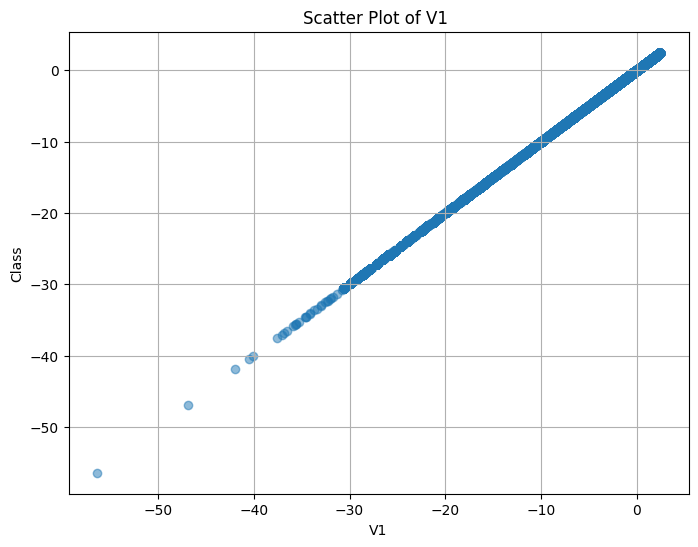

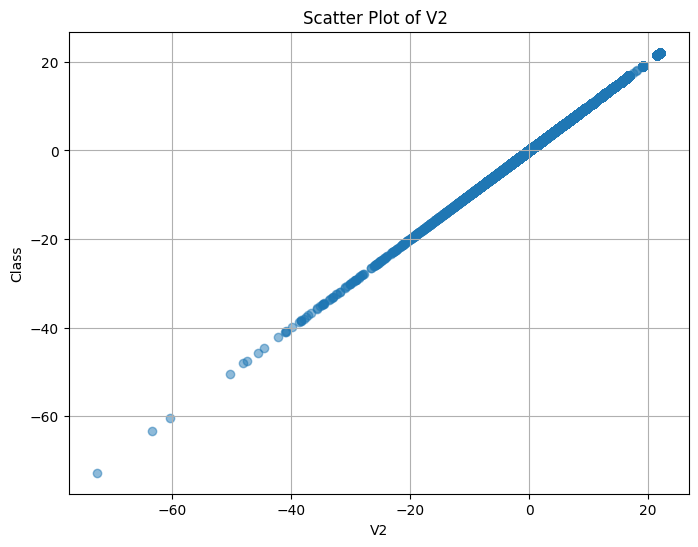

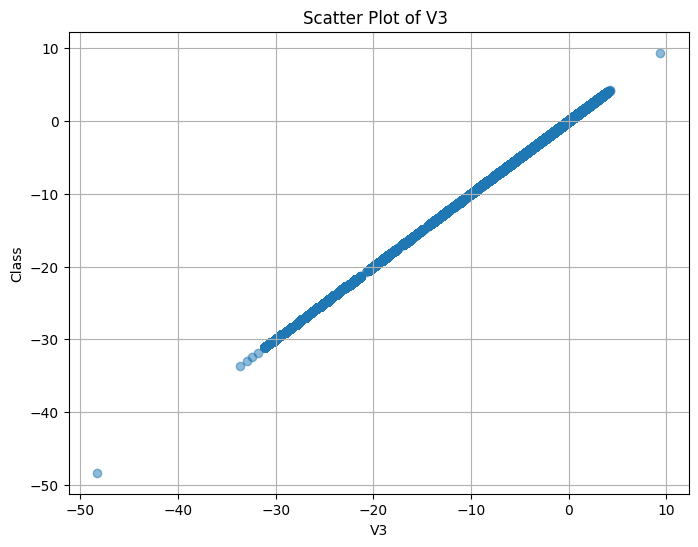

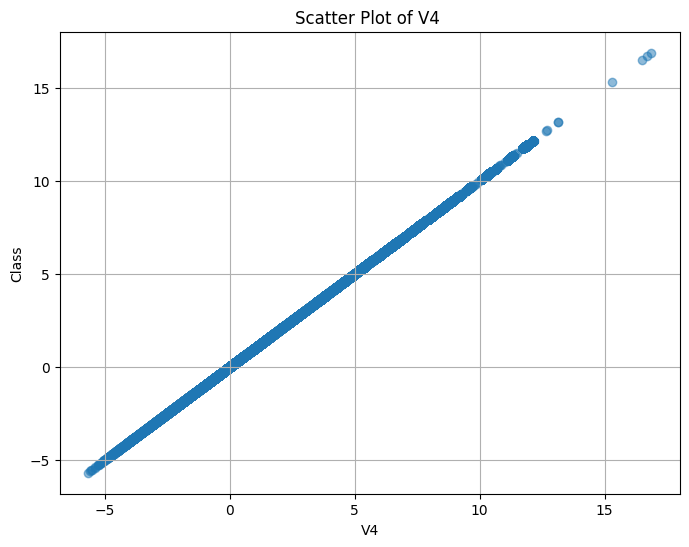

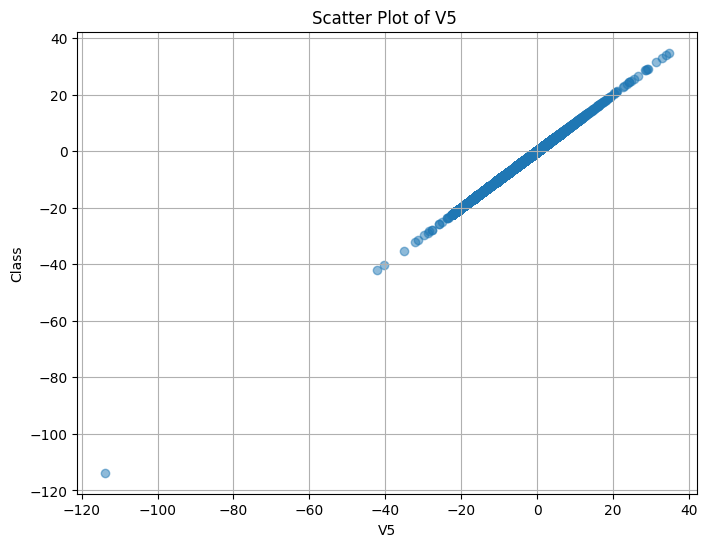

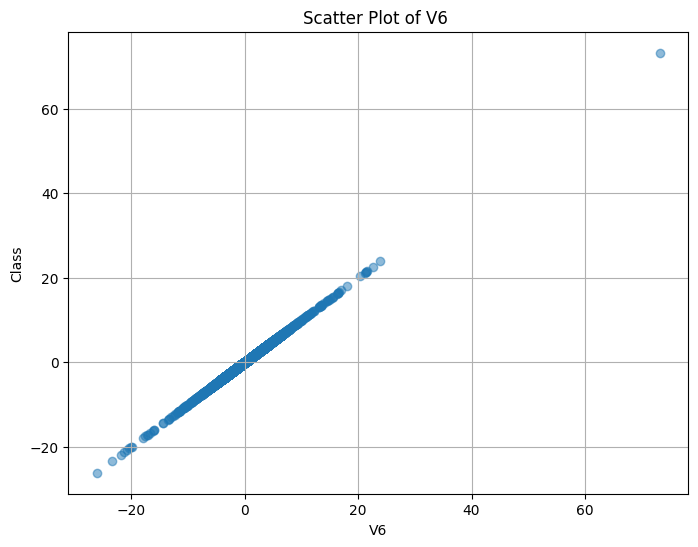

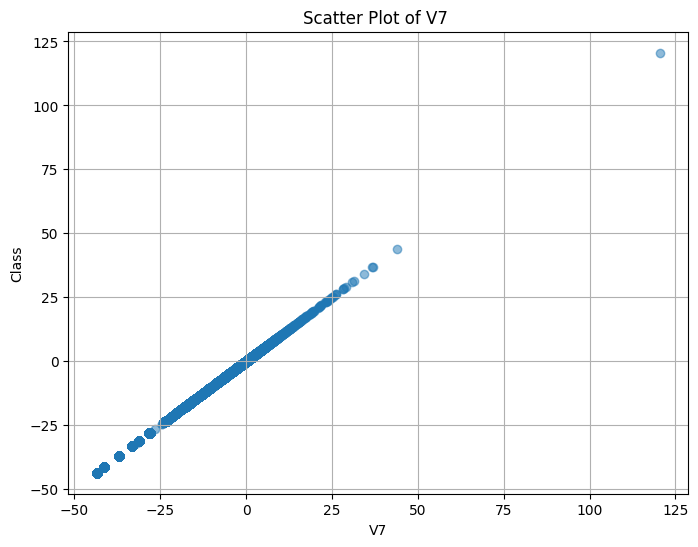

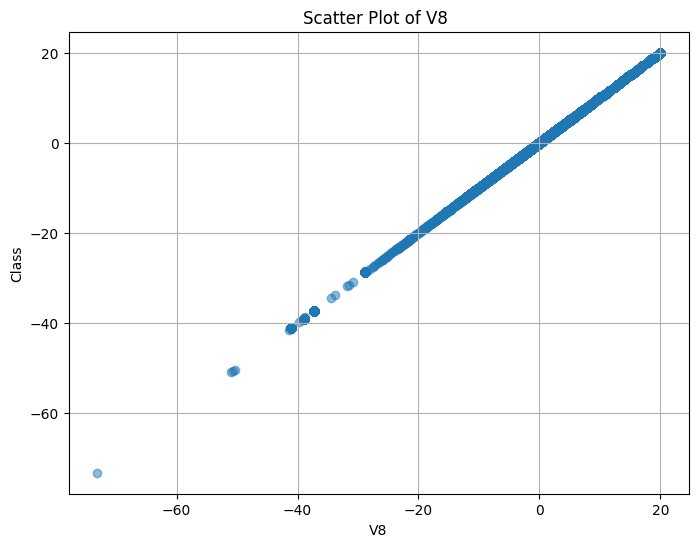

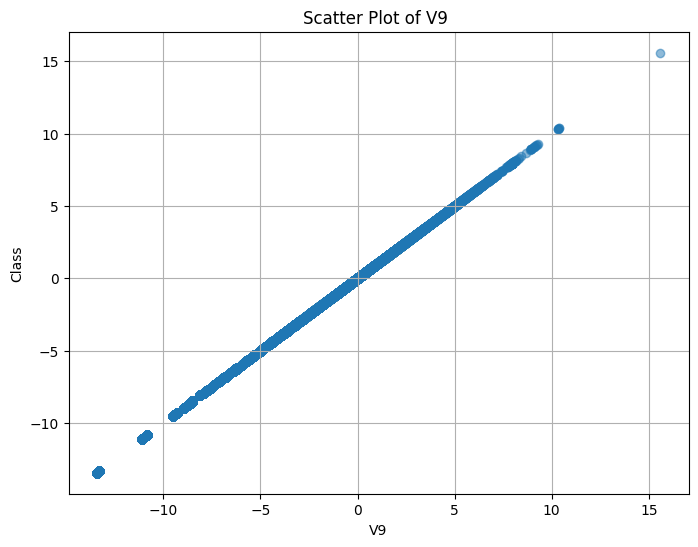

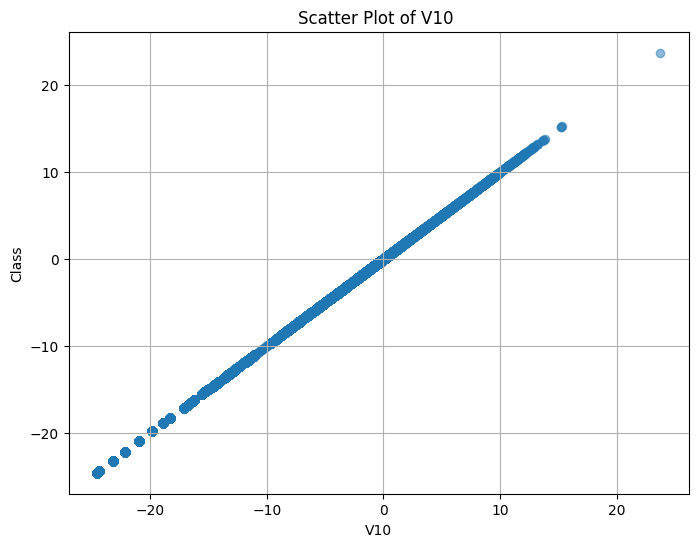

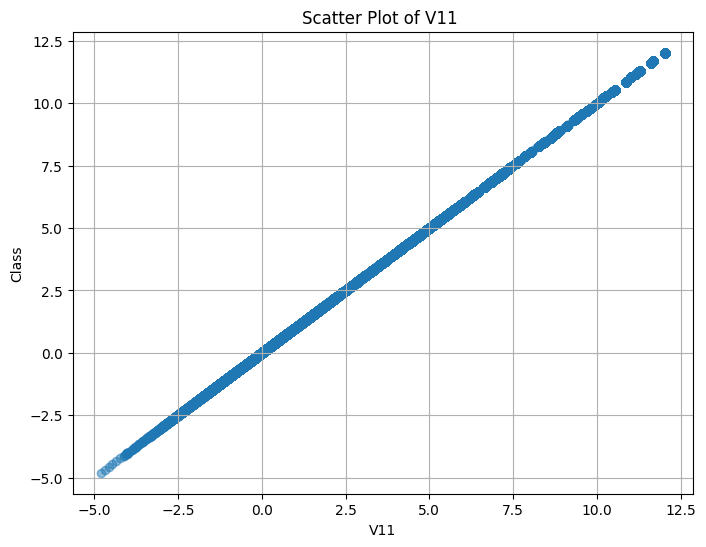

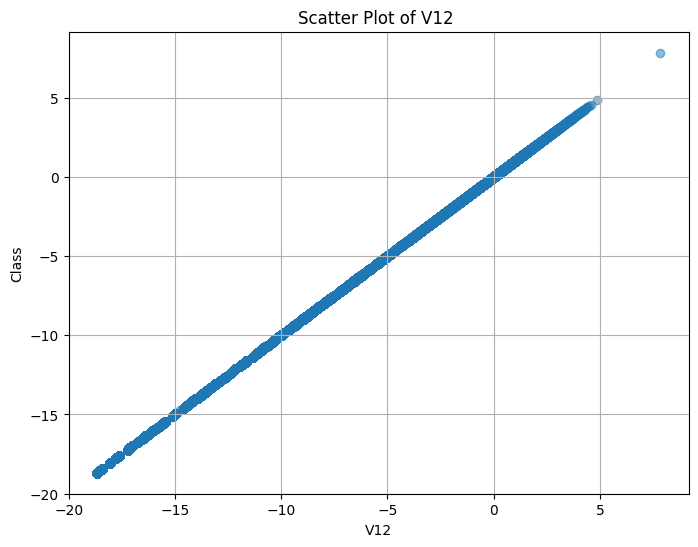

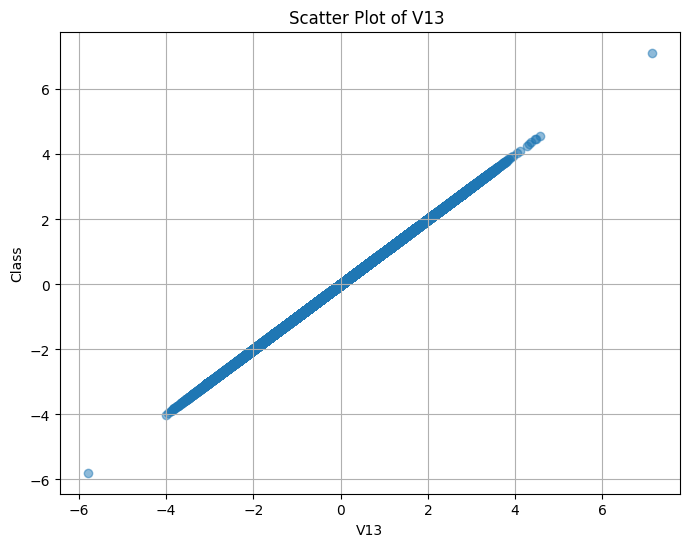

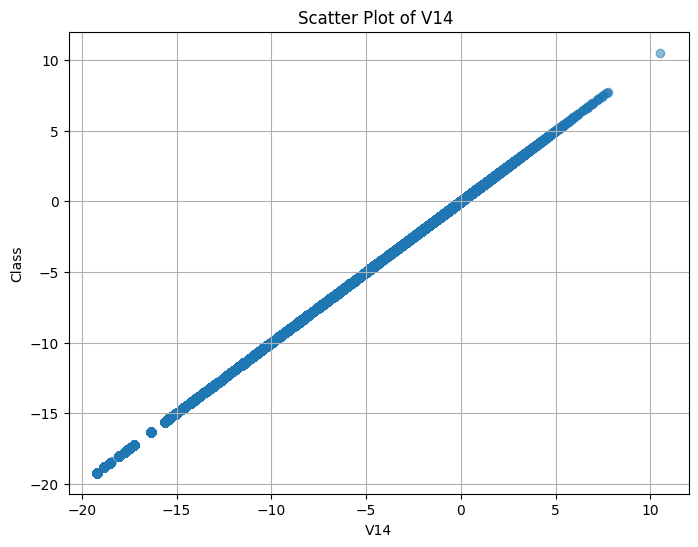

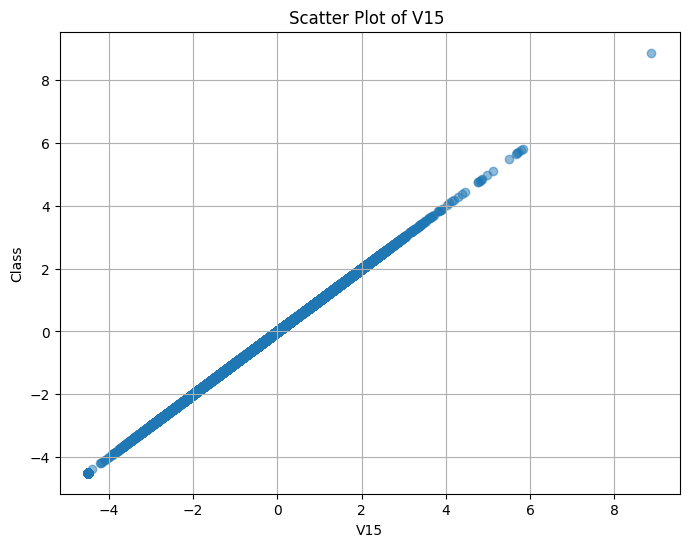

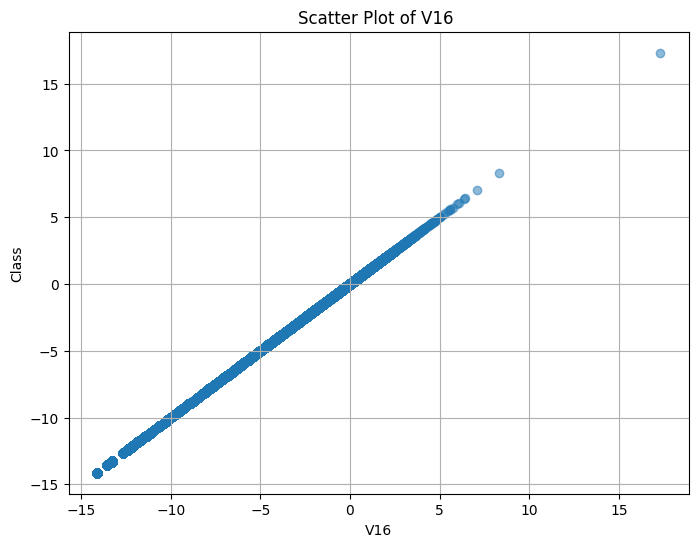

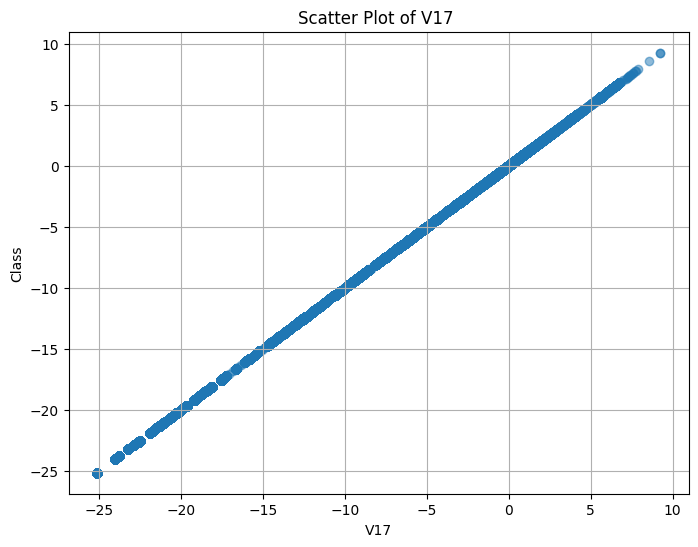

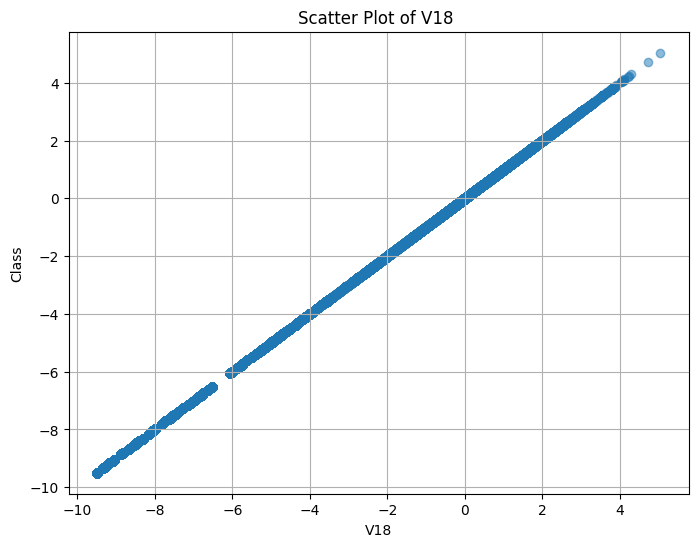

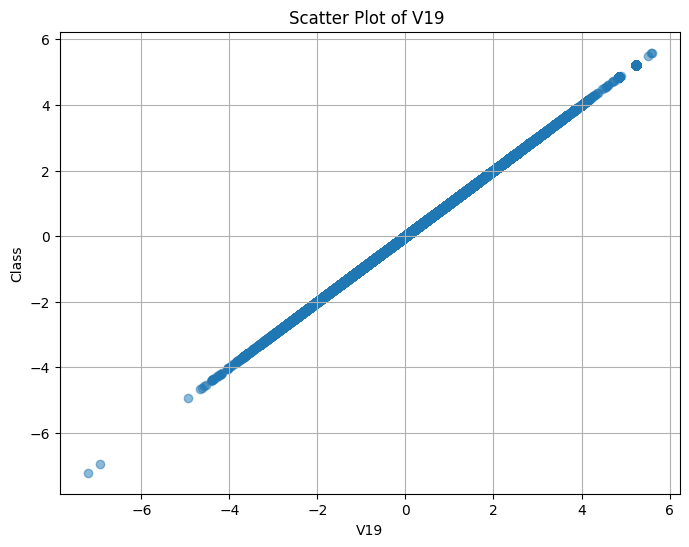

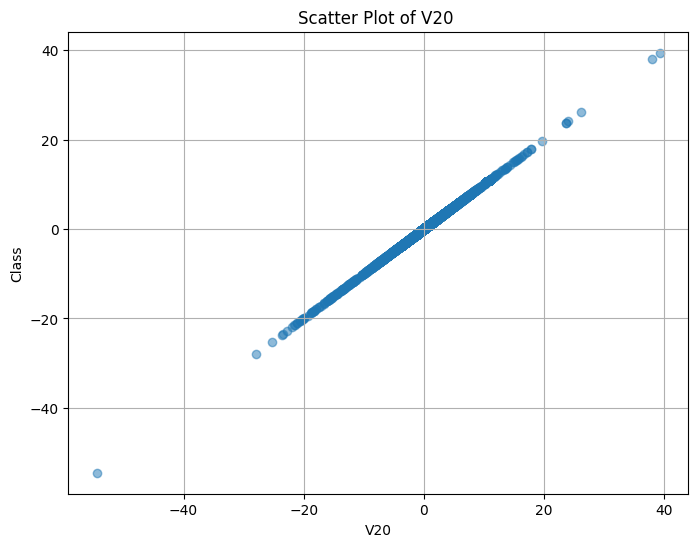

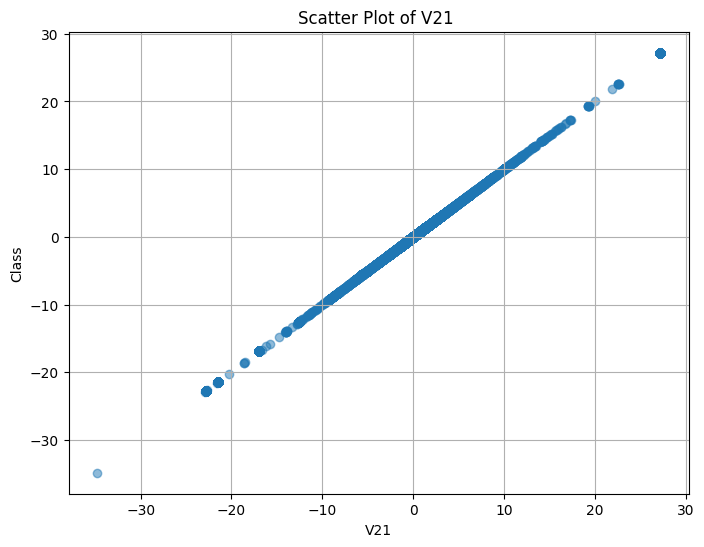

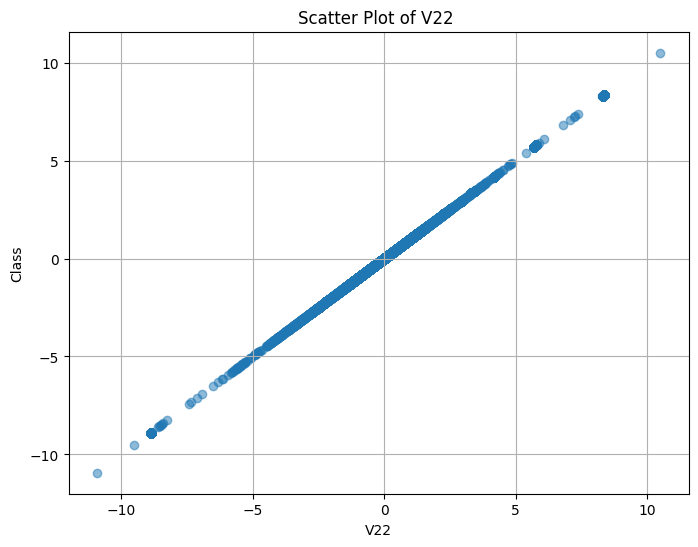

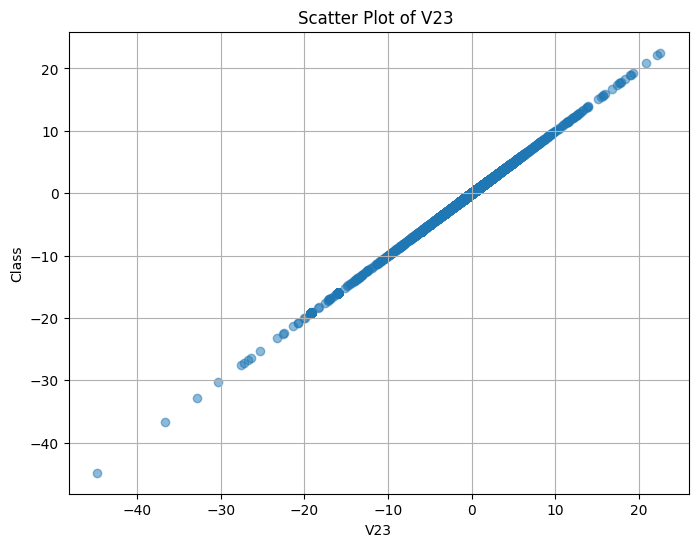

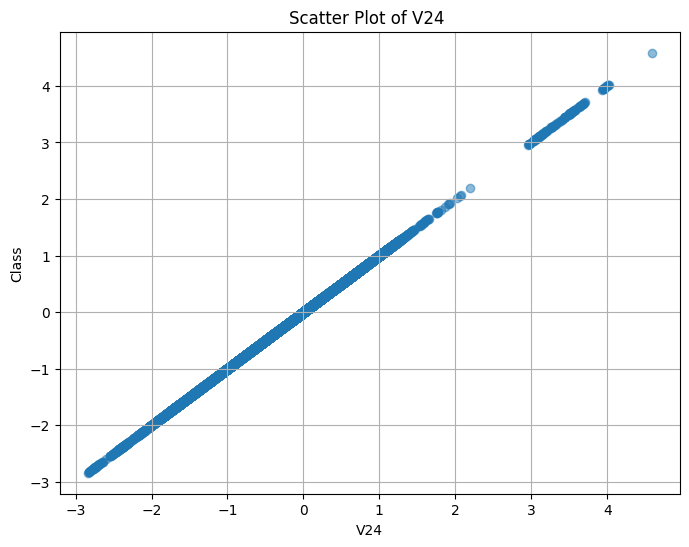

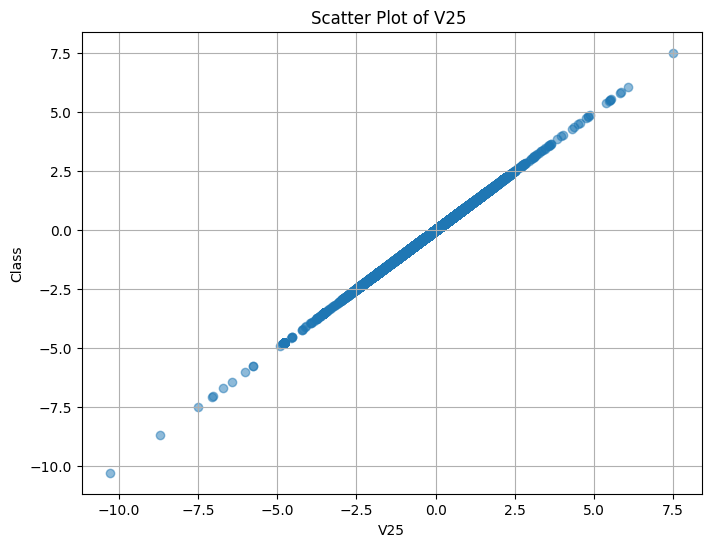

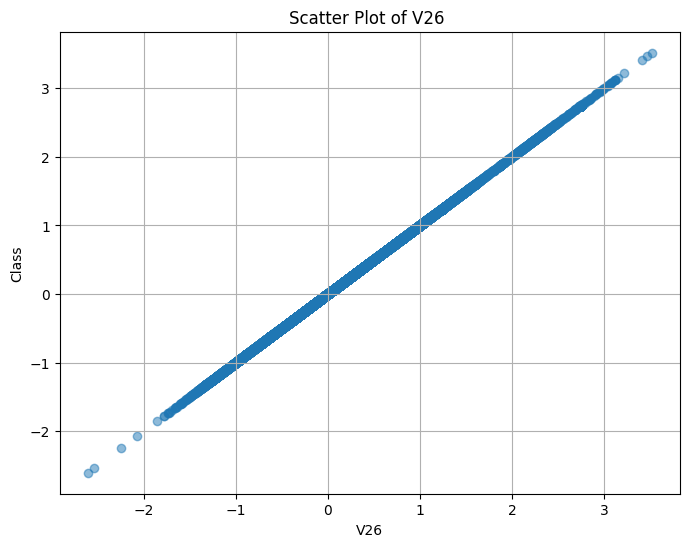

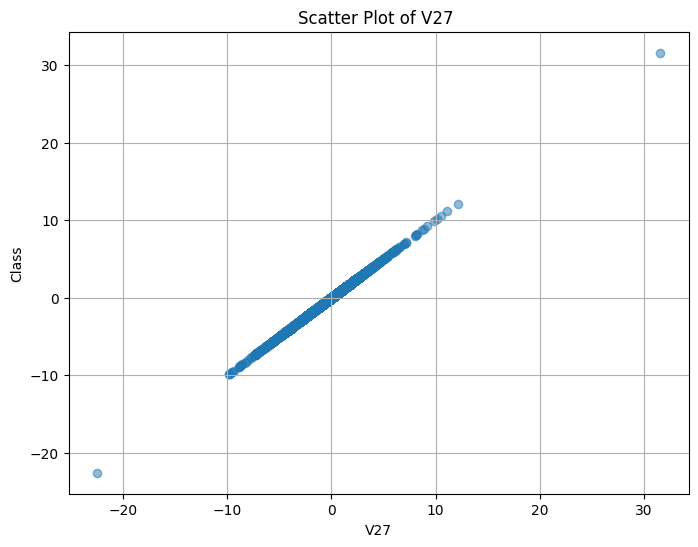

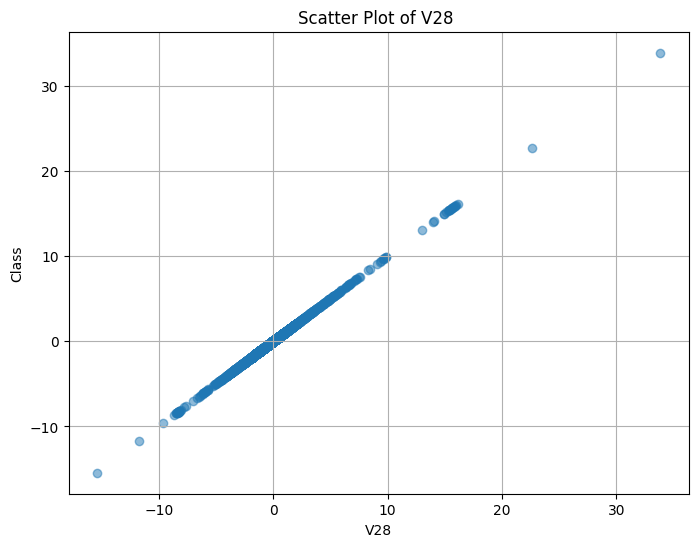

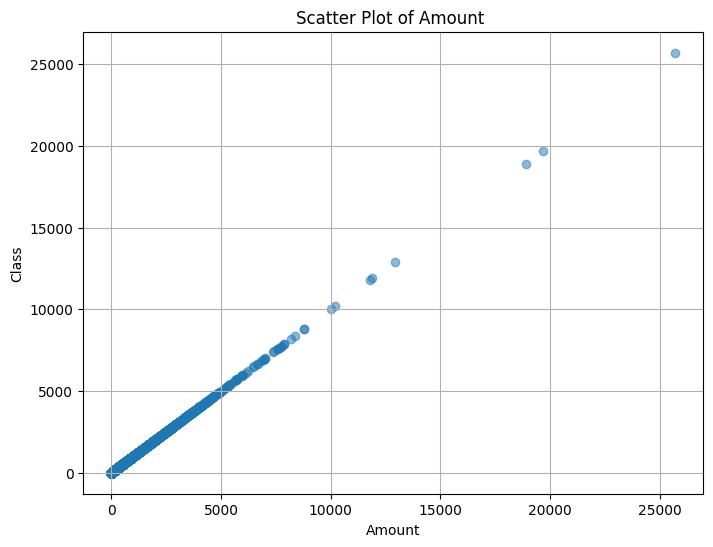

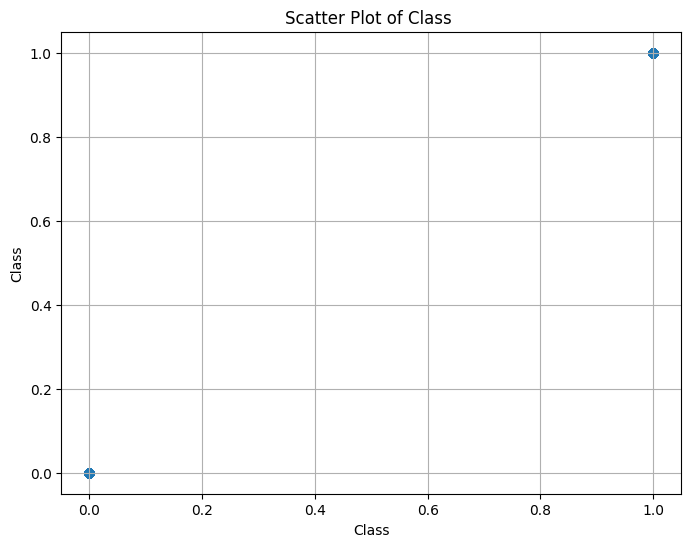

In [ ]:
import matplotlib.pyplot as plt

def check(df):
    for column in df.columns:
        if column != 'Time':
            plt.figure(figsize=(8, 6))
            plt.scatter(df[column], df[column], alpha=0.5)
            plt.title(f'Scatter Plot of {column} ')
            plt.xlabel(column)
            plt.ylabel('Class')
            plt.grid(True)
            plt.show()

check(credit) #This is a function to check the outliers existed in each feauture of the dataset

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np

def noNullsHere(df): # A function to remove the whole row which have nulls in case its found to handle nulls(no need for it :(((( )
  noNulls = []
  for i, r in df.iterrows():
    if not r.isnull().any():
      noNulls.append(r)
  return(pd.DataFrame(noNulls))

def catchOutlier(df, title):
    if df[title].dtype != float and df[title].dtype != int:
        return df  # Skip if not numeric

    if title == "Class":
        return df

    Q1 = df[title].quantile(0.25)
    Q3 = df[title].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    filtered = df[(df[title] >= lower_bound) & (df[title] <= upper_bound)]
    return filtered


In [ ]:
for i in credit.columns:
  credit = catchOutlier(credit, i)

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158952 entries, 0 to 568625
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      158952 non-null  float64
 1   V2      158952 non-null  float64
 2   V3      158952 non-null  float64
 3   V4      158952 non-null  float64
 4   V5      158952 non-null  float64
 5   V6      158952 non-null  float64
 6   V7      158952 non-null  float64
 7   V8      158952 non-null  float64
 8   V9      158952 non-null  float64
 9   V10     158952 non-null  float64
 10  V11     158952 non-null  float64
 11  V12     158952 non-null  float64
 12  V13     158952 non-null  float64
 13  V14     158952 non-null  float64
 14  V15     158952 non-null  float64
 15  V16     158952 non-null  float64
 16  V17     158952 non-null  float64
 17  V18     158952 non-null  float64
 18  V19     158952 non-null  float64
 19  V20     158952 non-null  float64
 20  V21     158952 non-null  float64
 21  V22     158952 

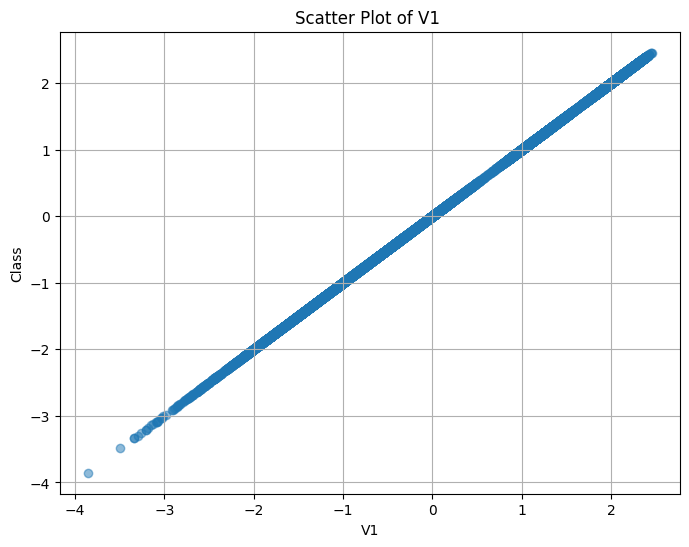

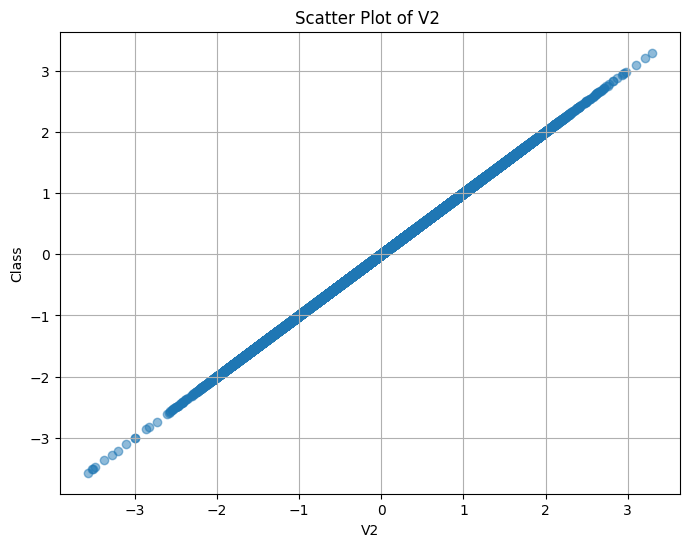

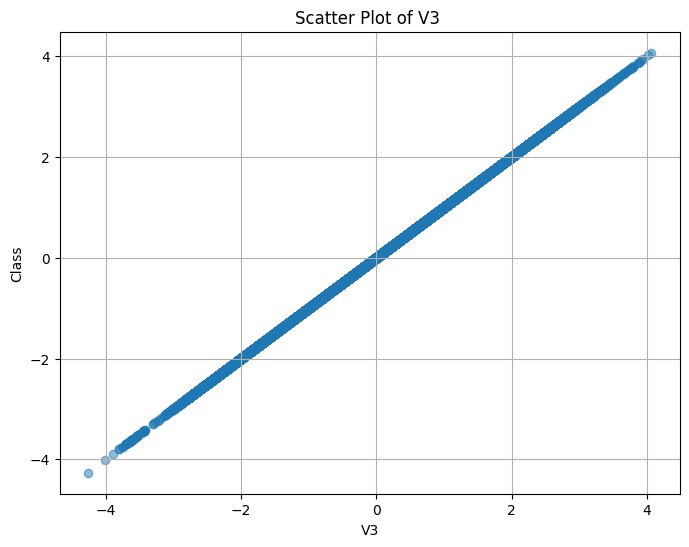

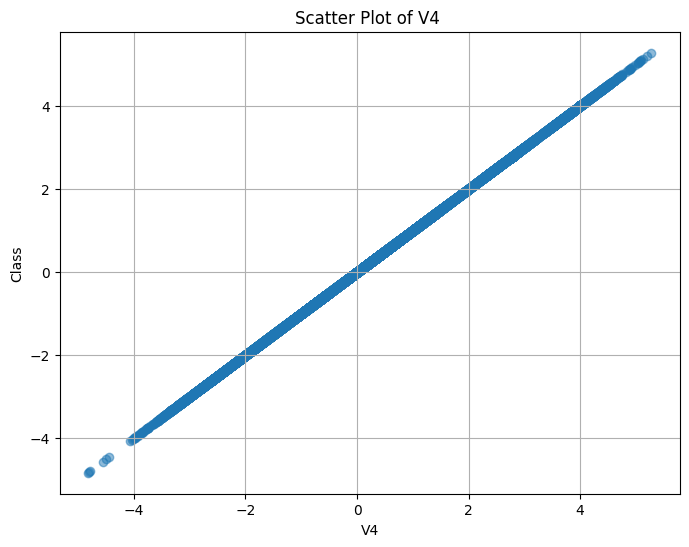

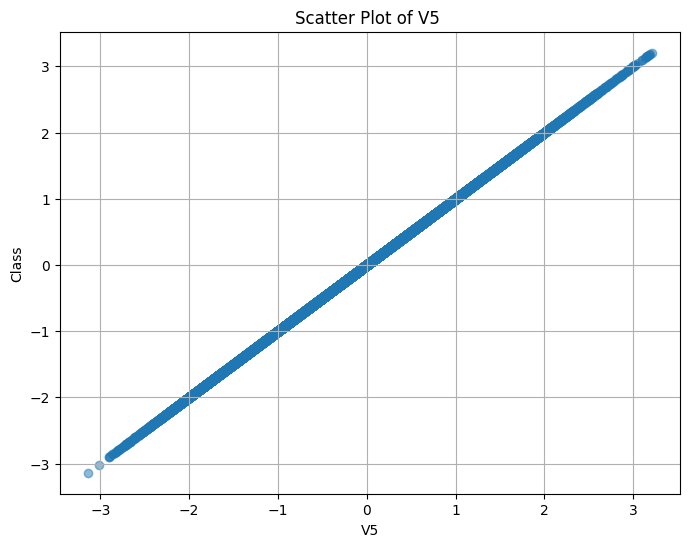

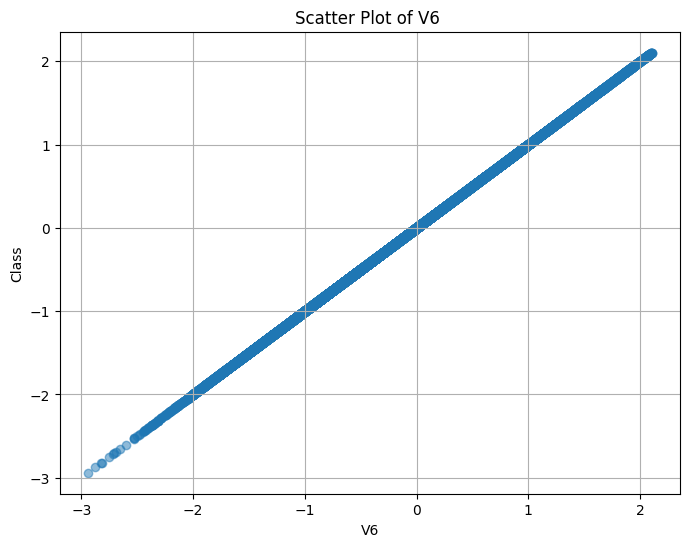

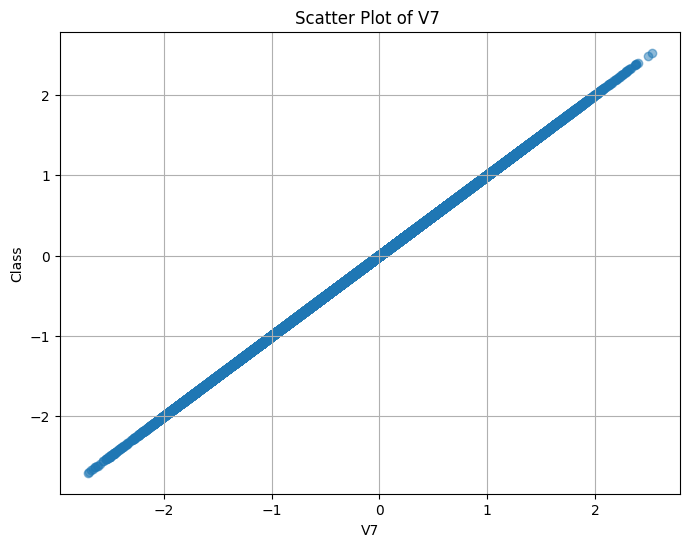

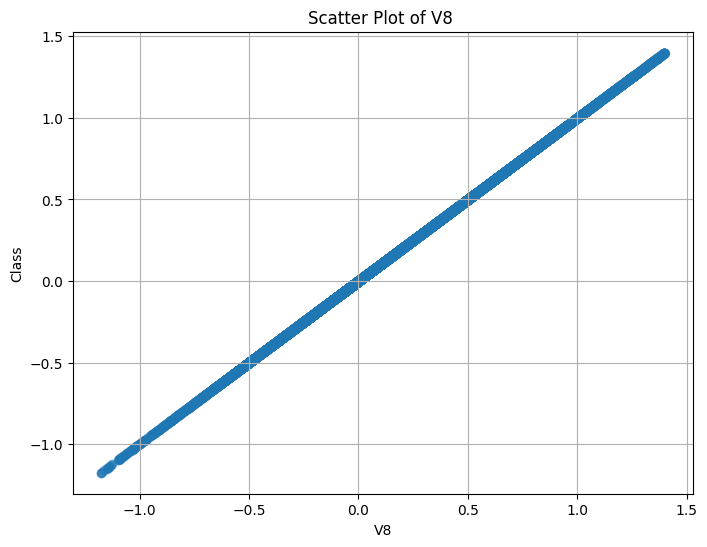

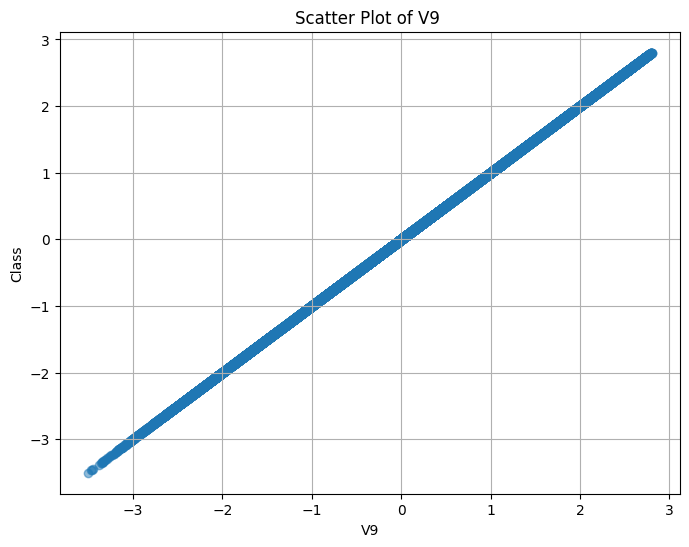

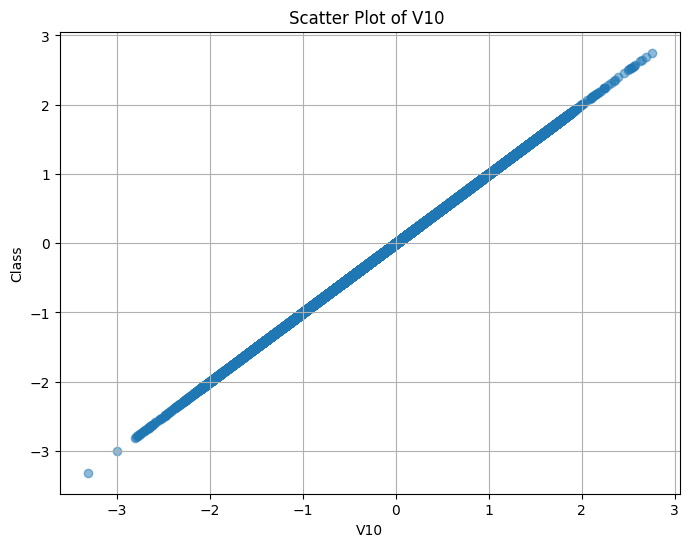

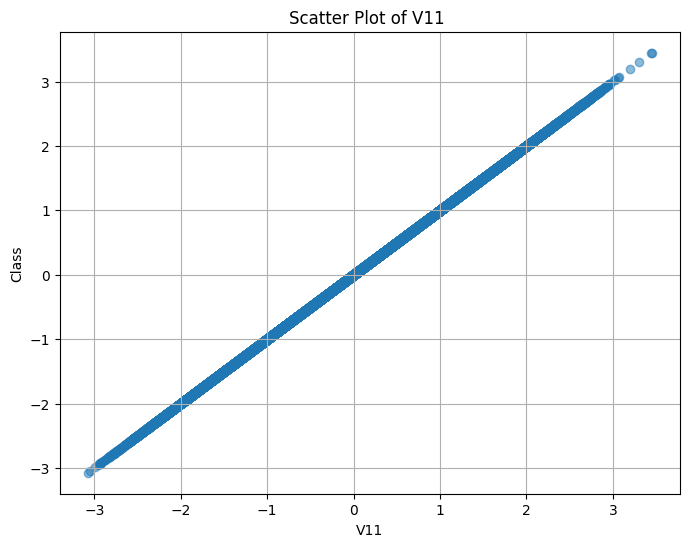

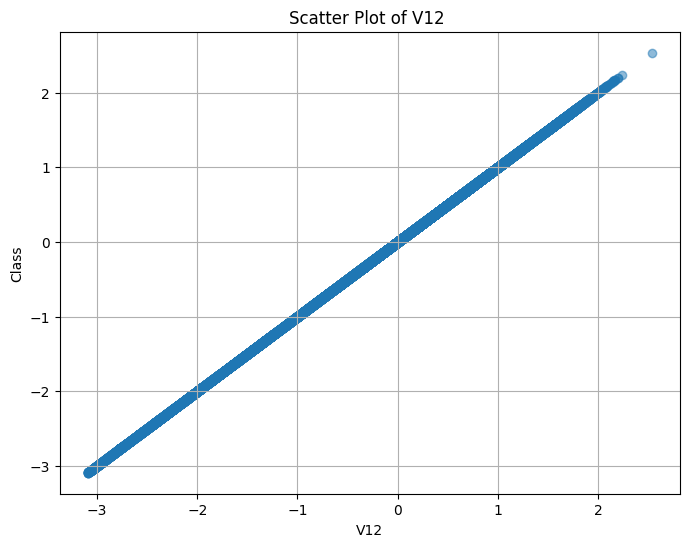

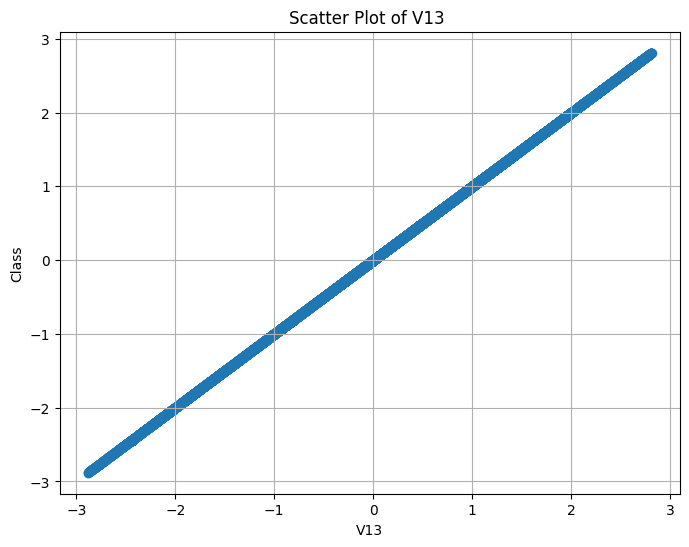

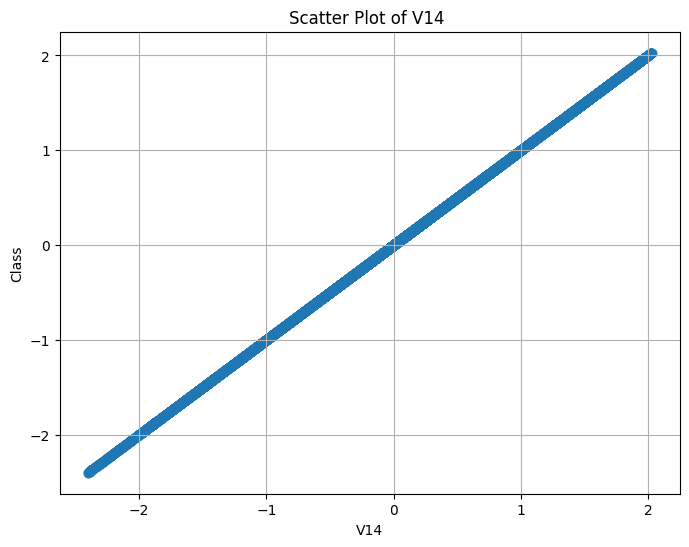

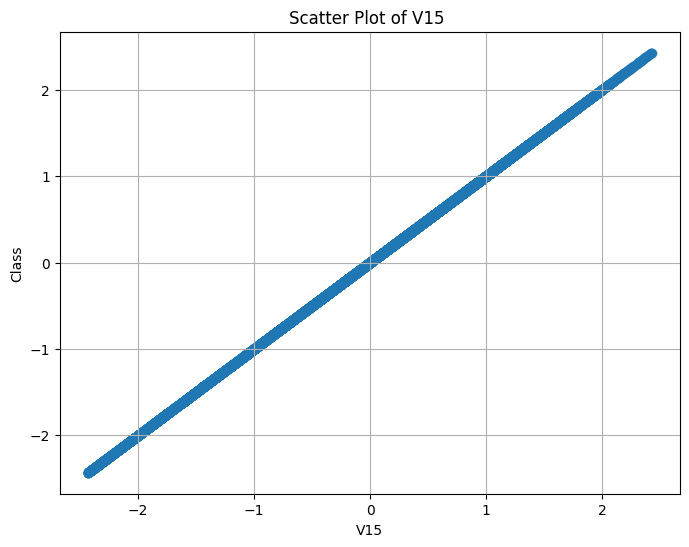

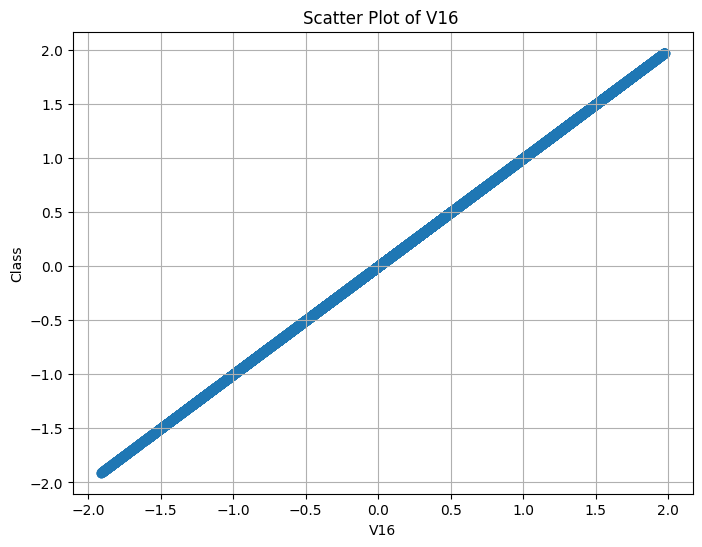

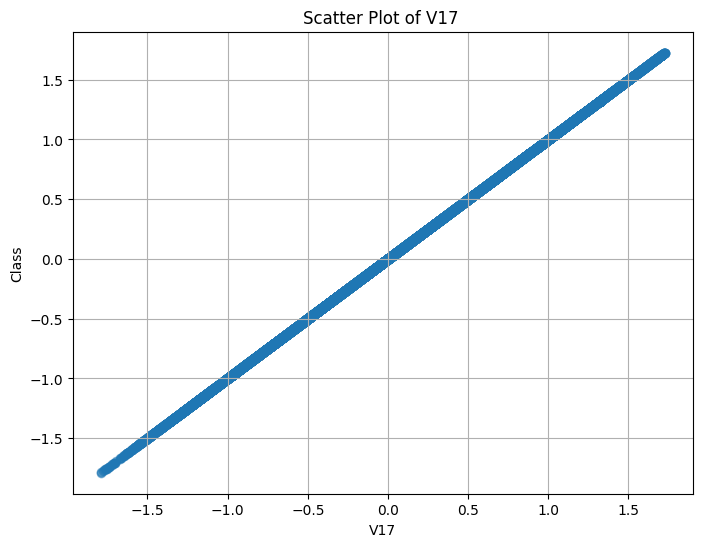

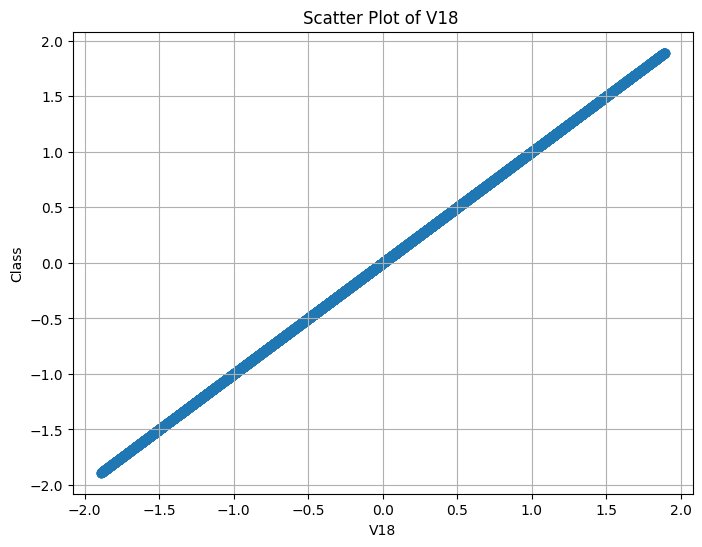

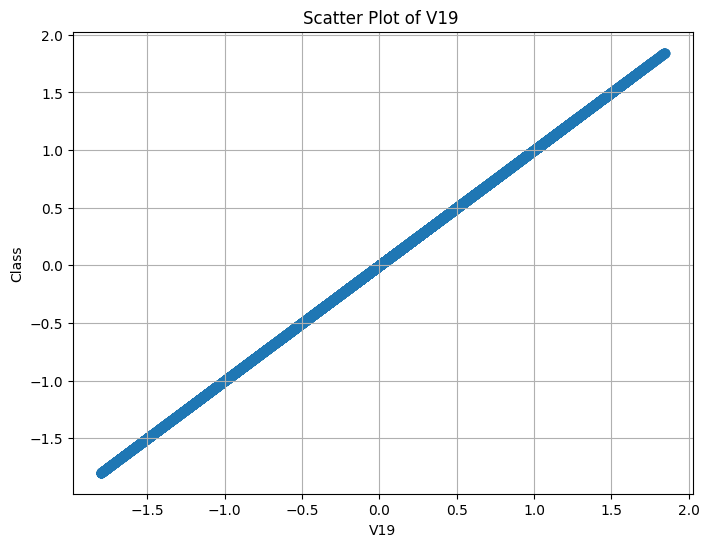

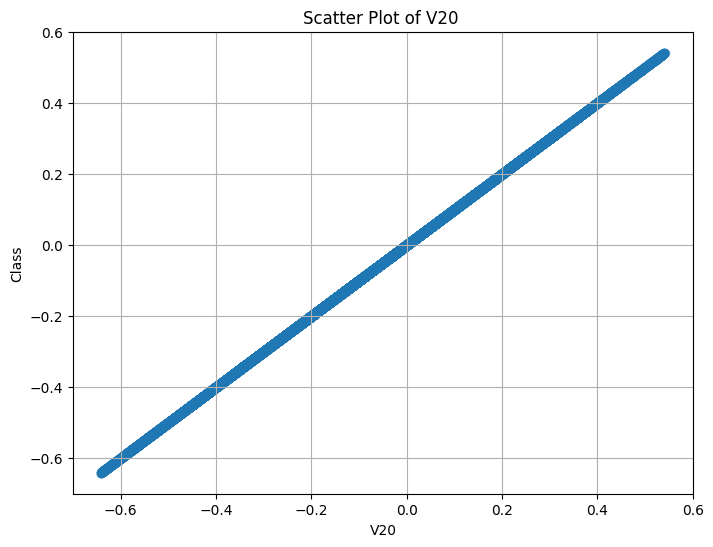

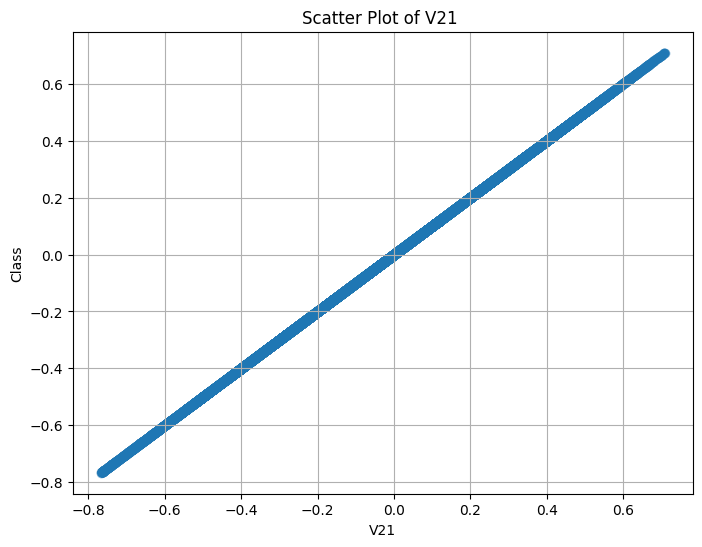

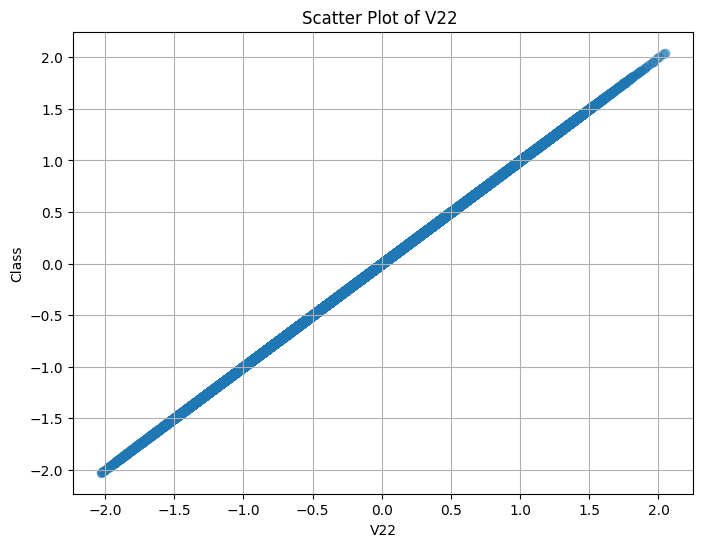

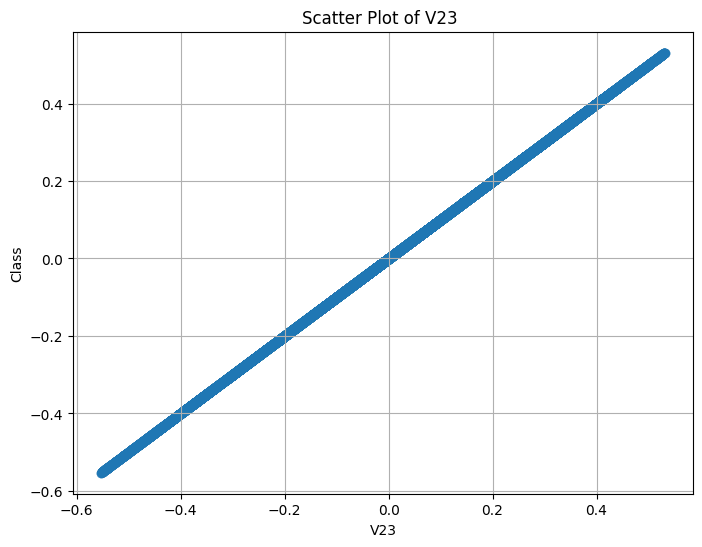

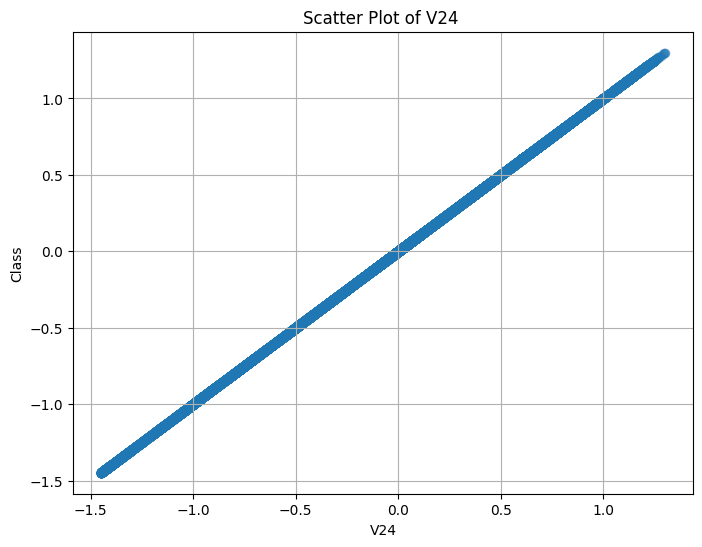

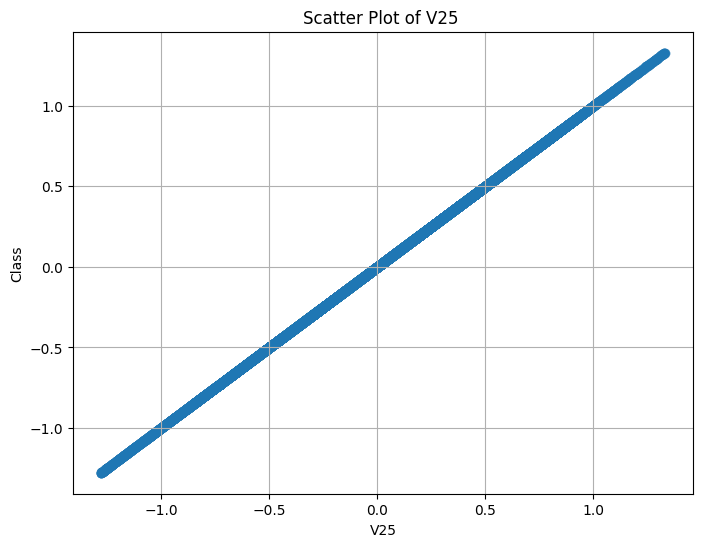

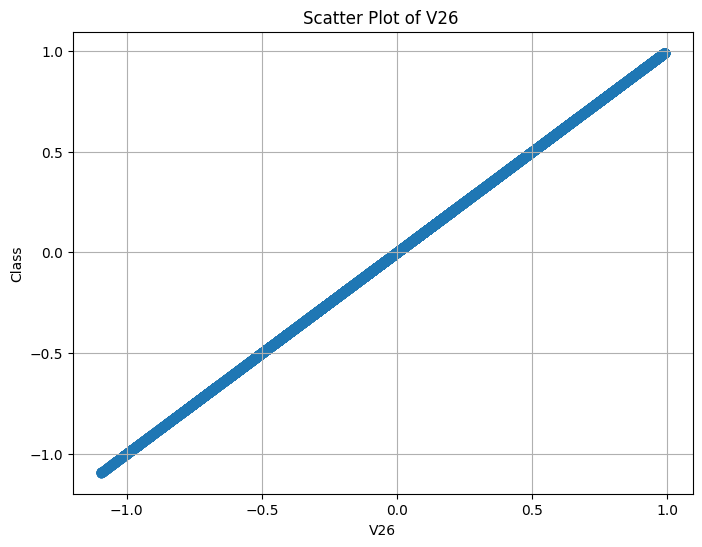

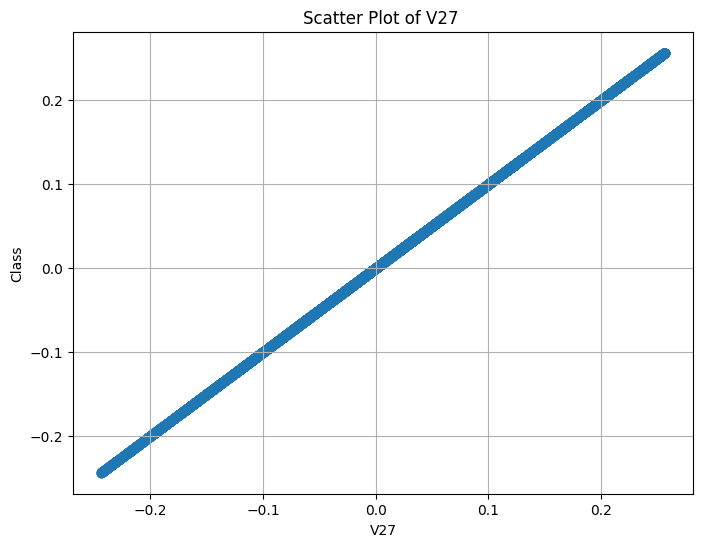

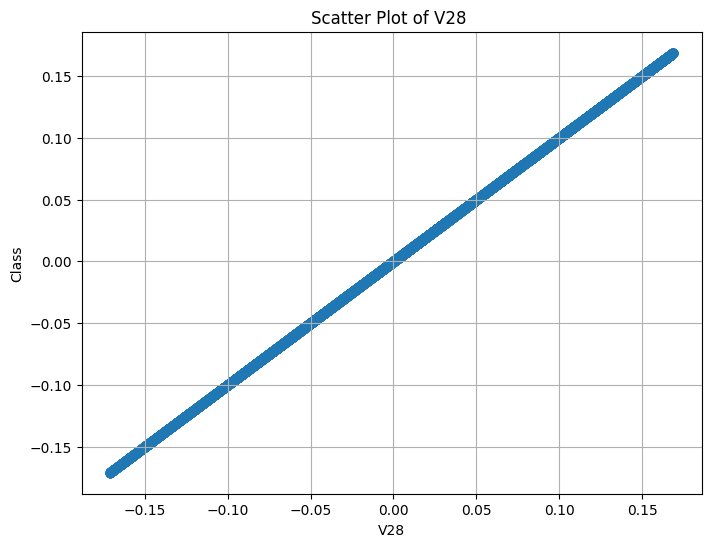

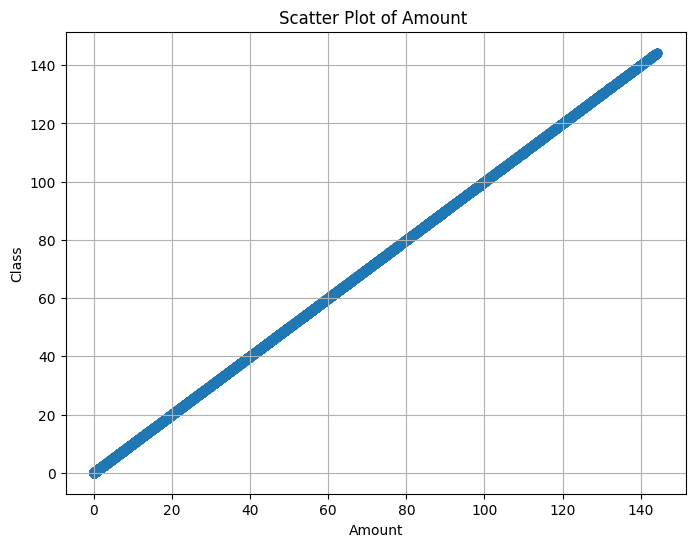

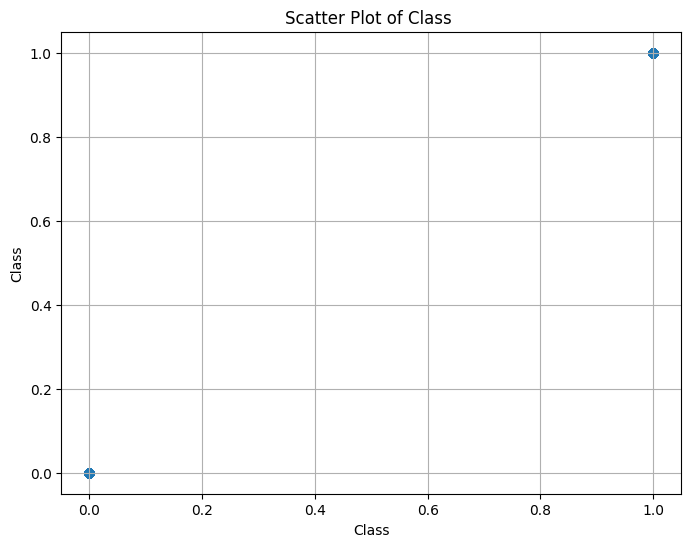

In [ ]:
check(credit)

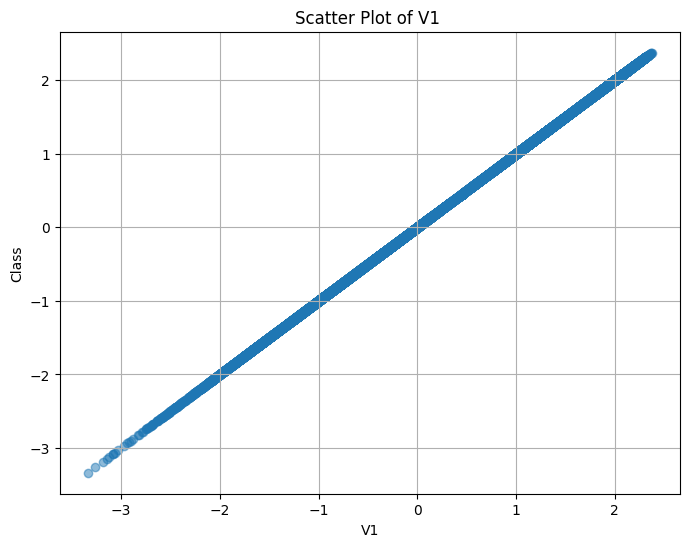

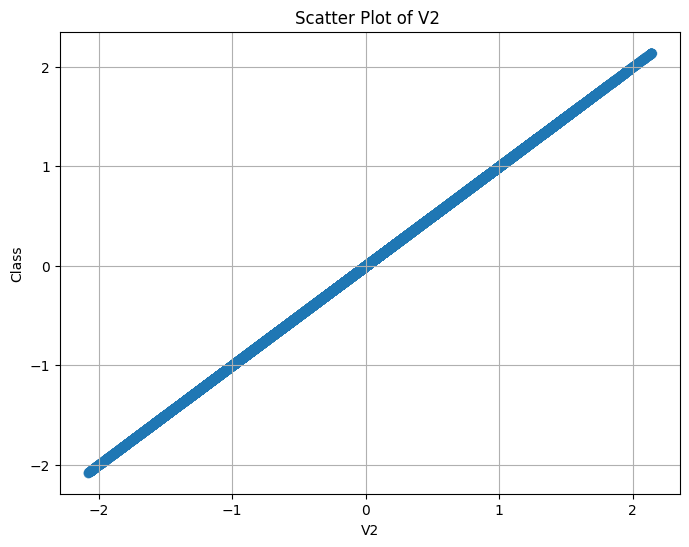

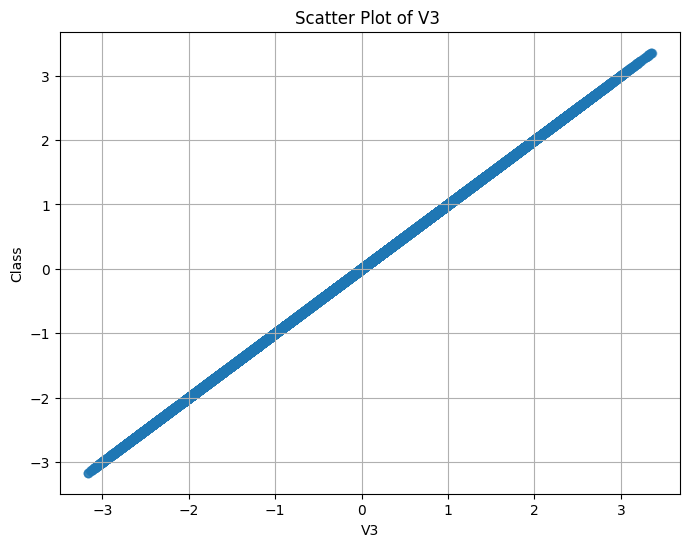

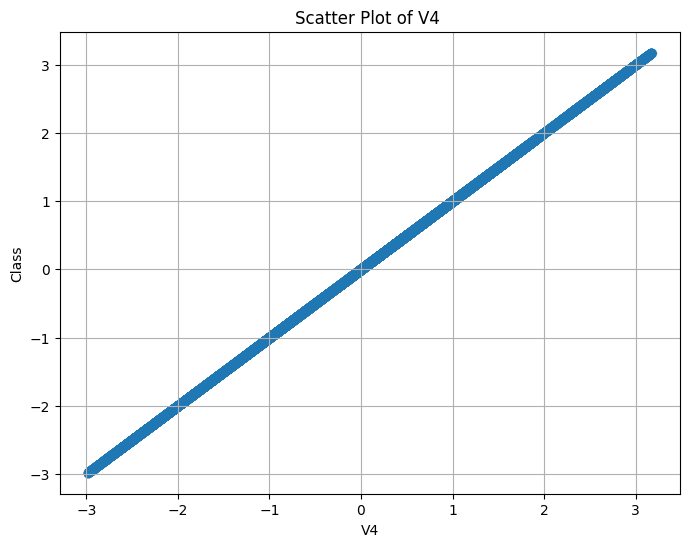

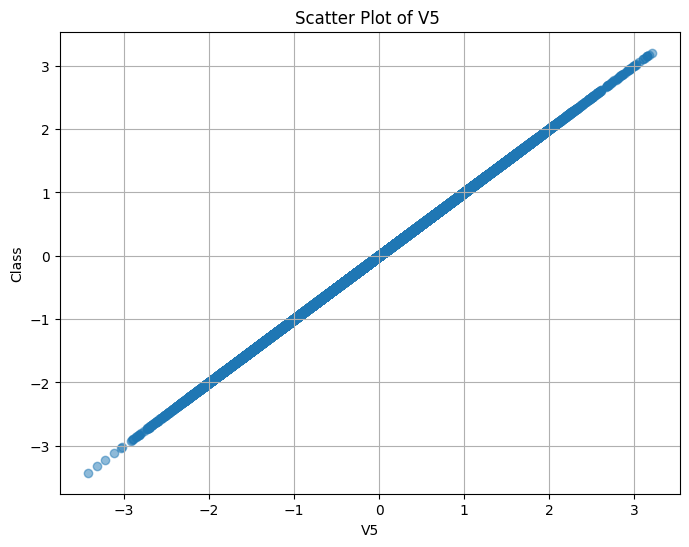

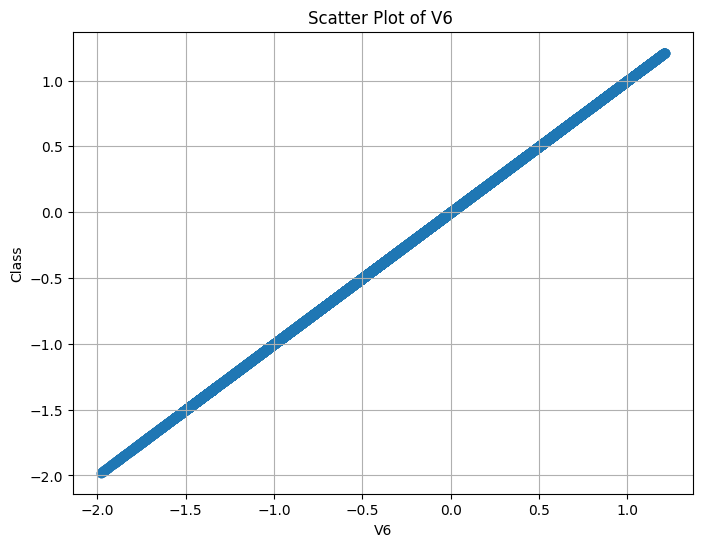

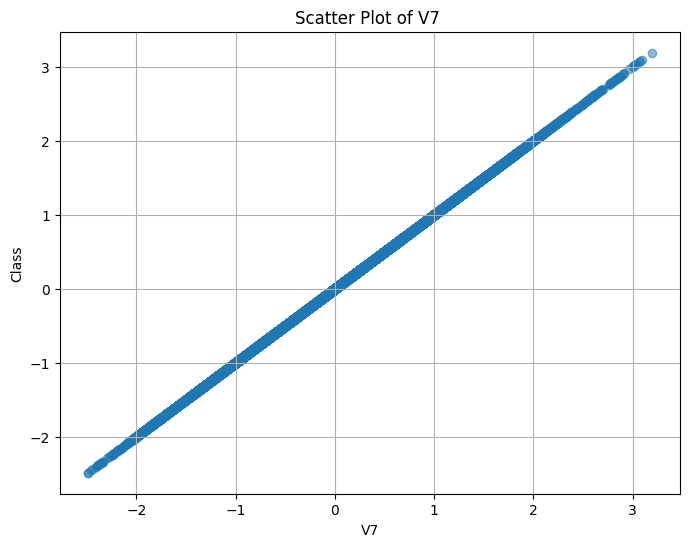

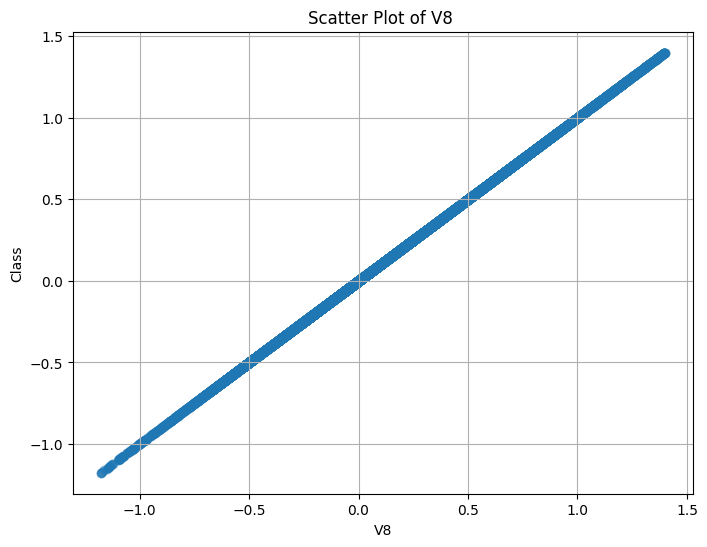

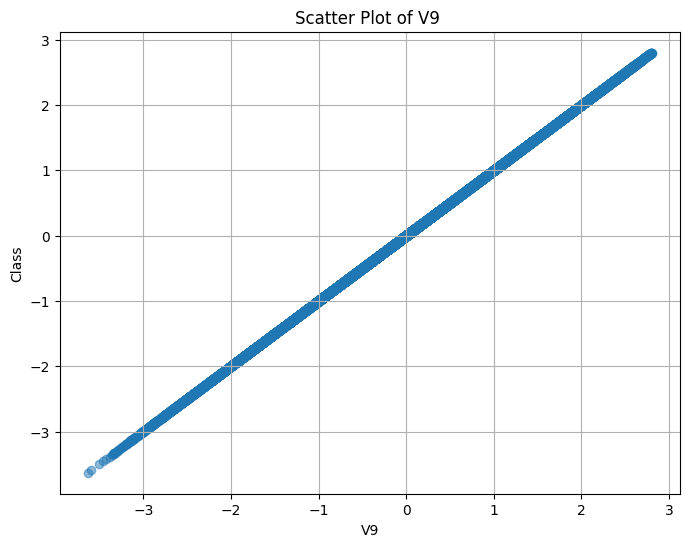

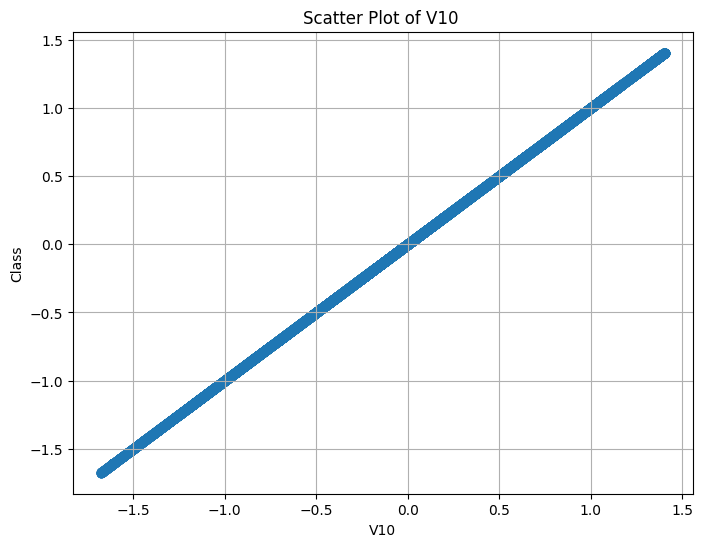

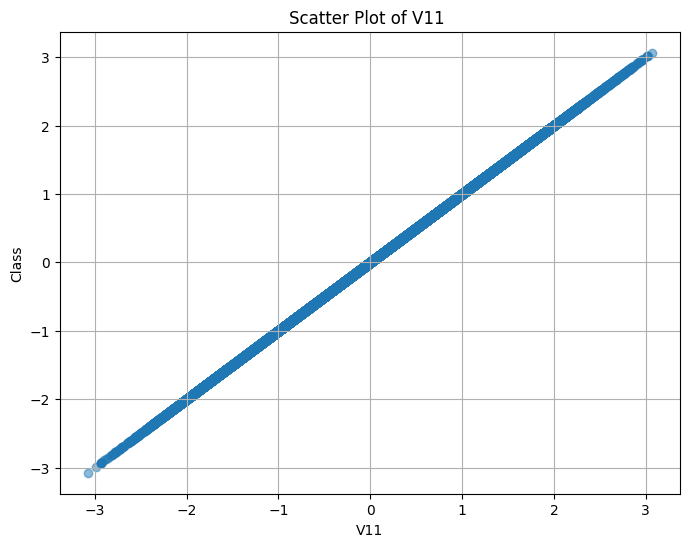

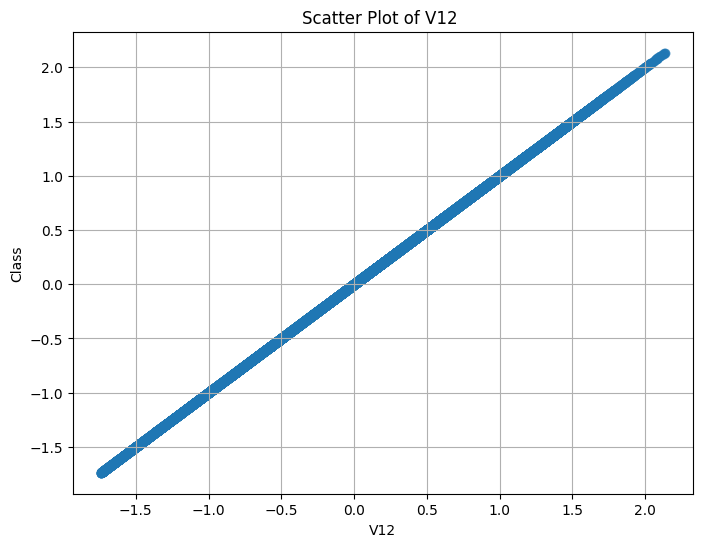

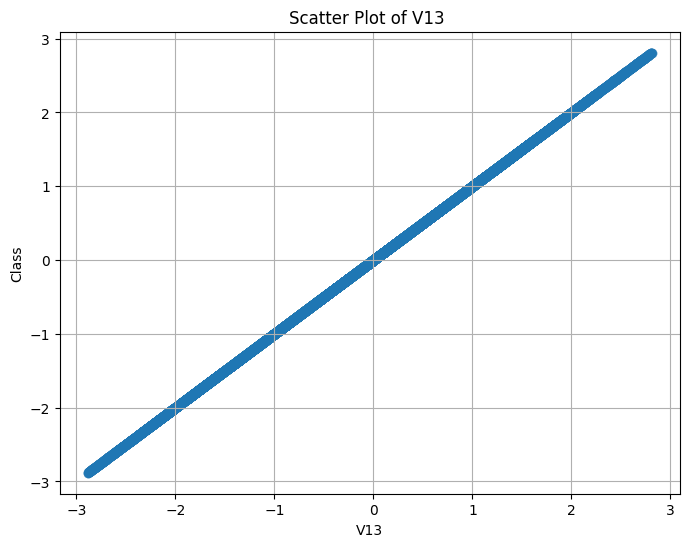

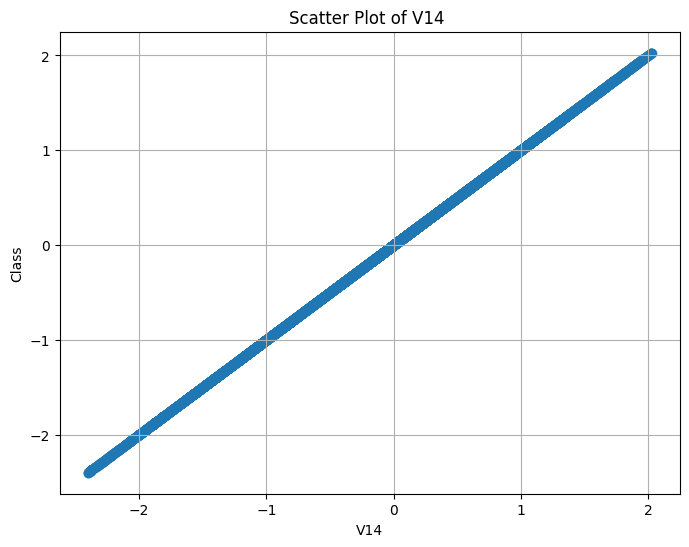

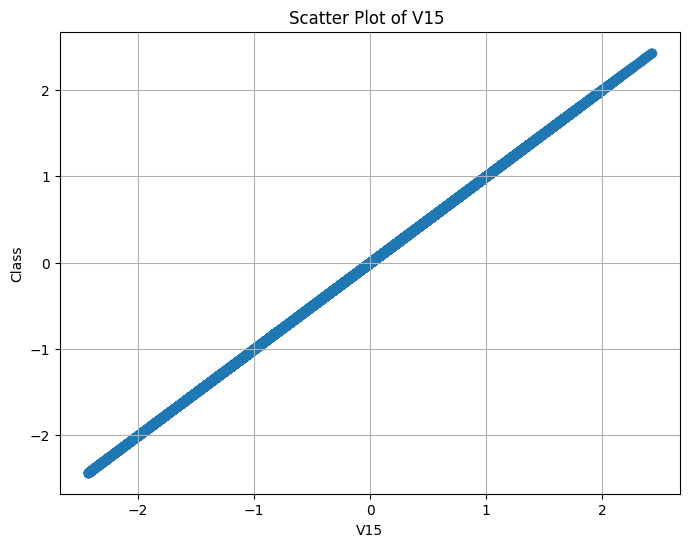

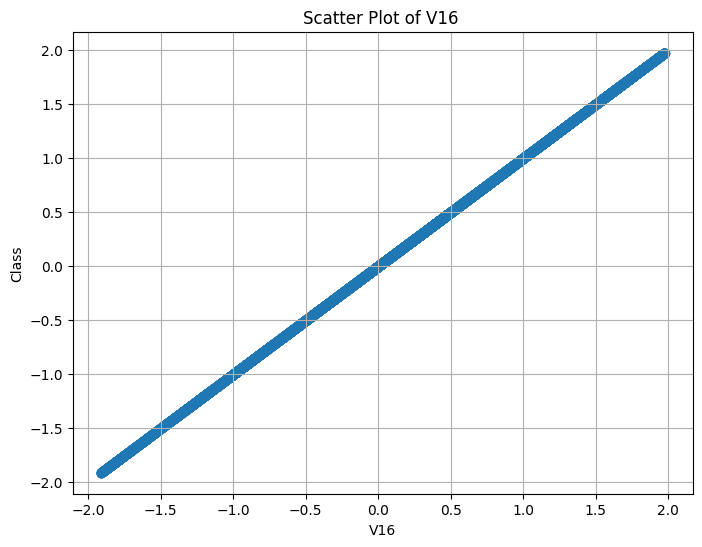

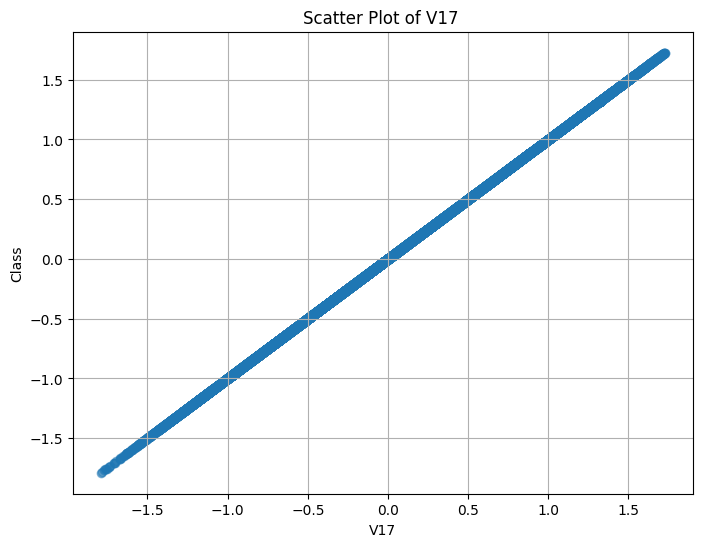

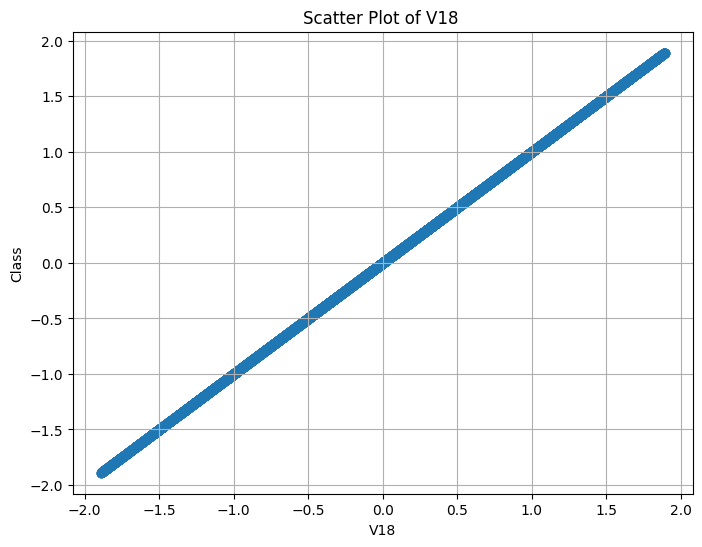

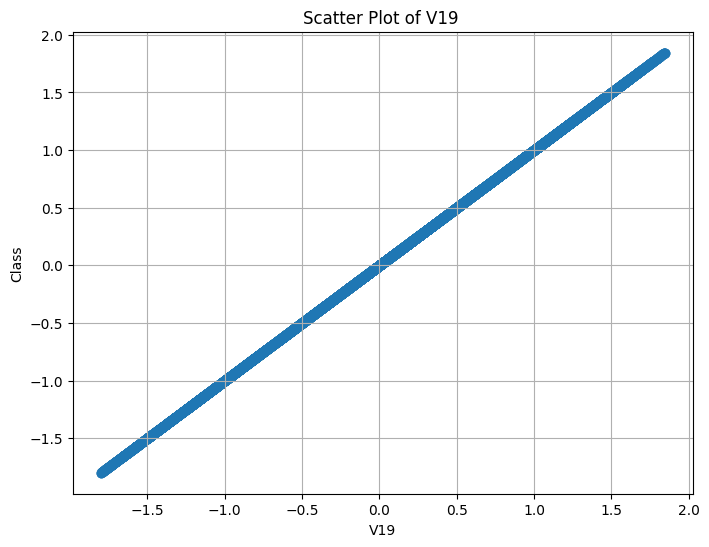

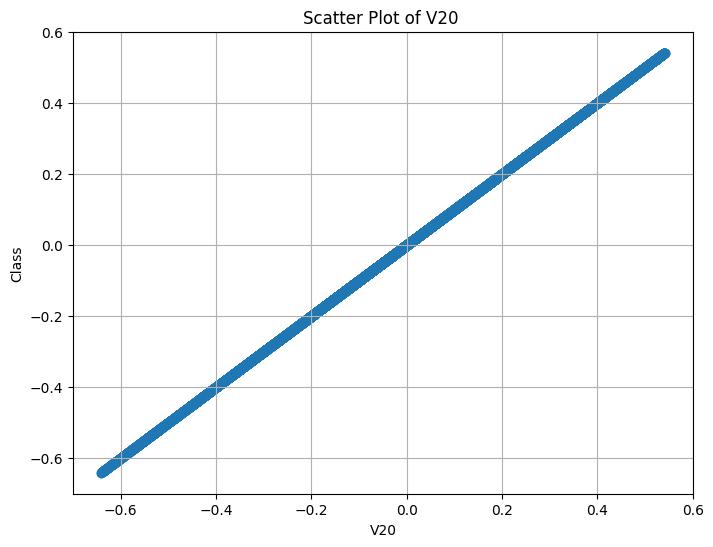

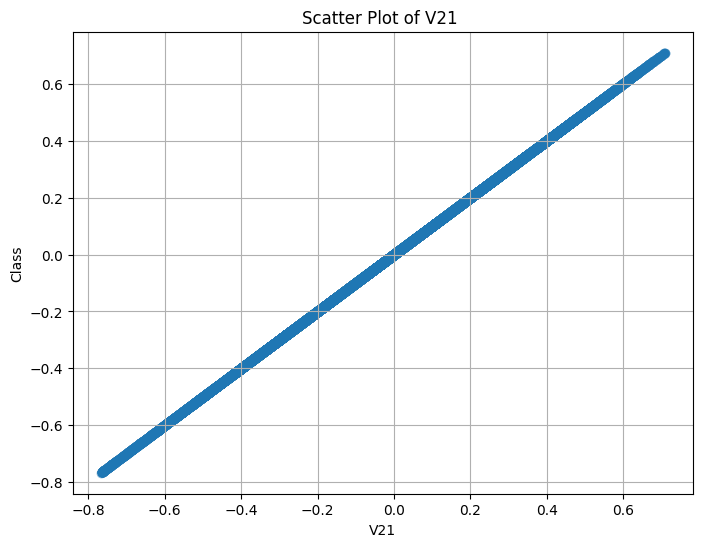

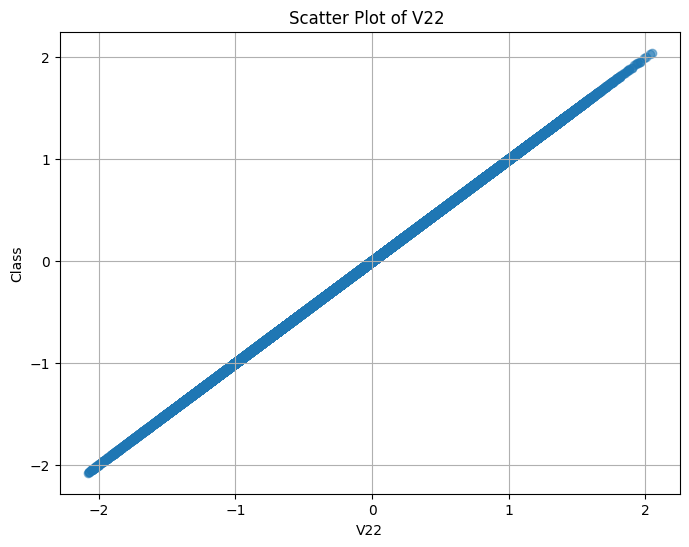

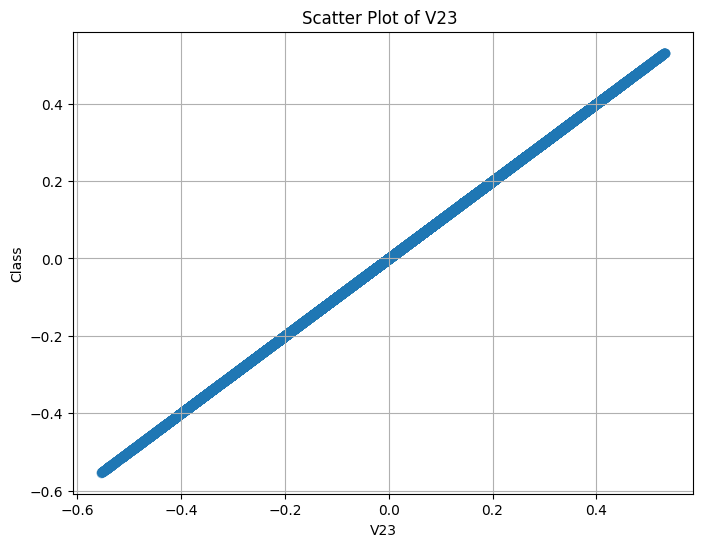

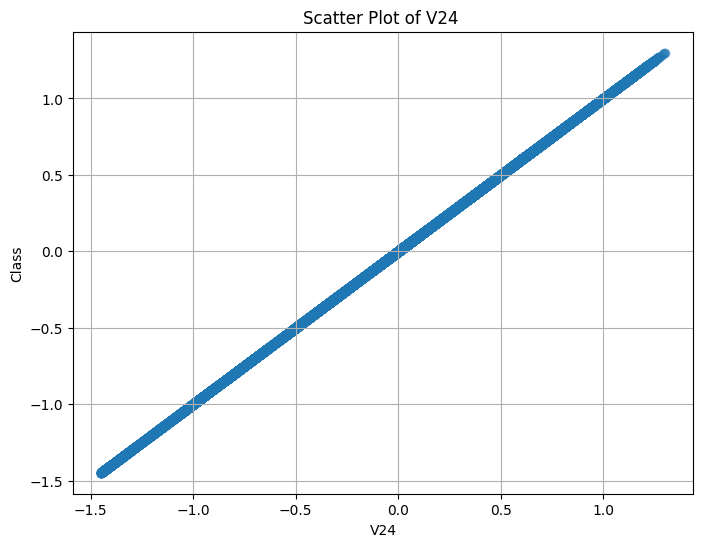

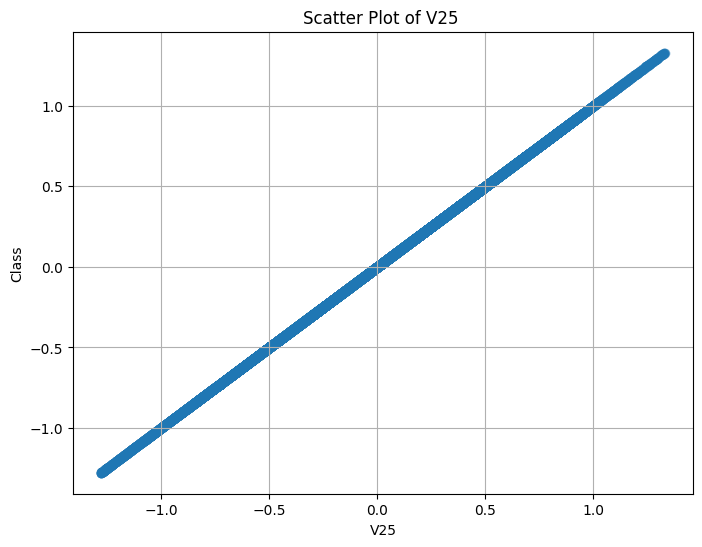

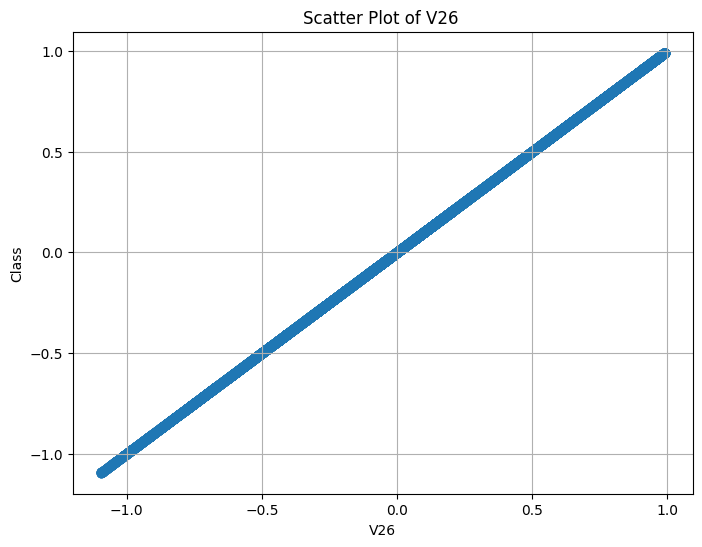

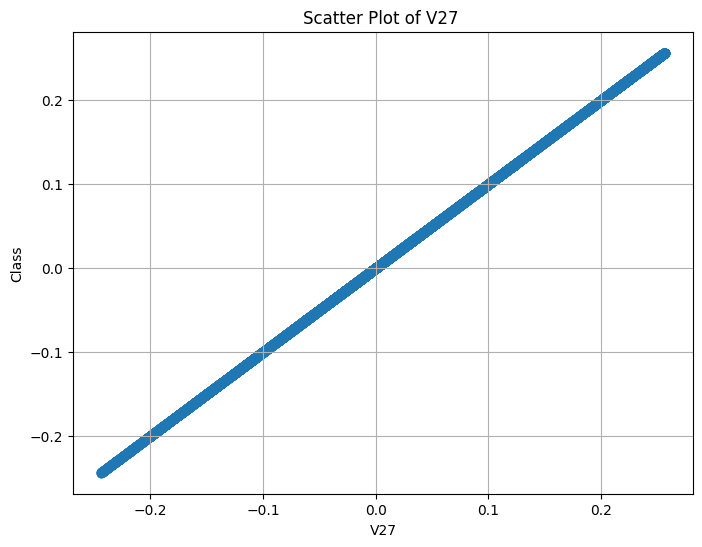

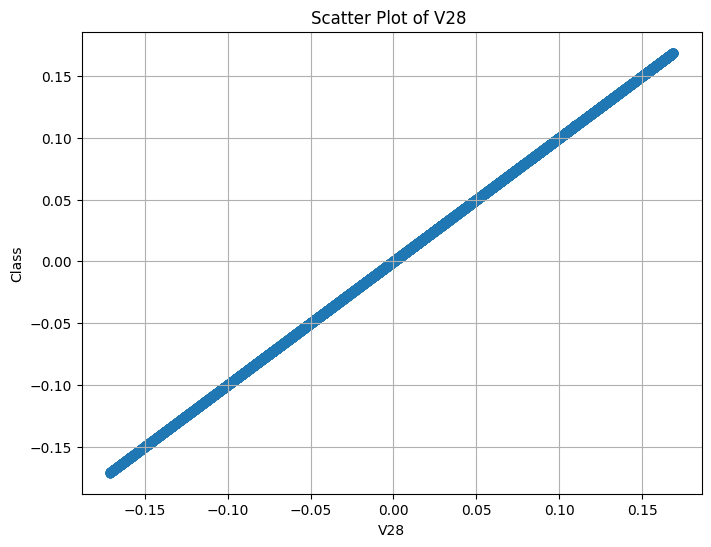

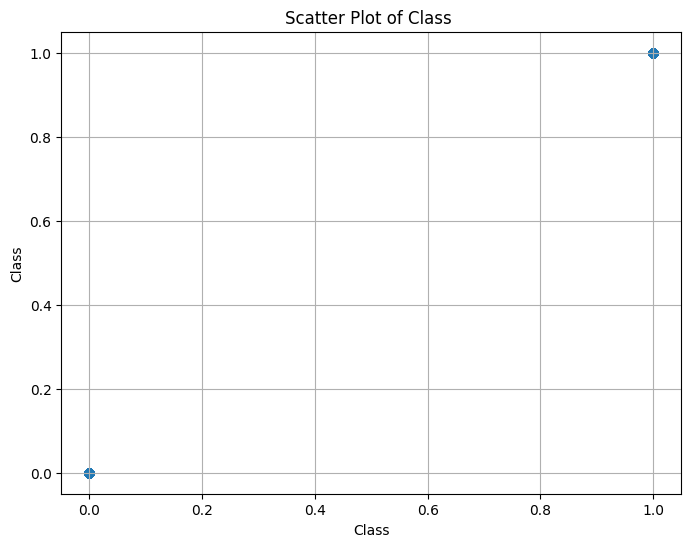

In [ ]:
credit = catchOutlier(credit, "V1")
credit = catchOutlier(credit, "V2")
credit = catchOutlier(credit, "V3")
credit = catchOutlier(credit, "V4")
credit = catchOutlier(credit, "V6")
credit = catchOutlier(credit, "V10")
credit = catchOutlier(credit, "V11")
credit = catchOutlier(credit, "V12")
check(credit)

In [ ]:
X = credit.drop('Class', axis=1)
y = credit["Class"]

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

**###############################################################**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
count = 0
for c in y_test:
  if c ==1:
    count+=1
print("Class 1 count is: " , count)
count = 0
for c in y_test:
  if c ==0:
    count+=1
print("Class 0 count is: " , count)

Class 1 count is:  2310
Class 0 count is:  25045


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

SVC = SVC()
SVC.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('knn', knn),
    ('logistic', logistic),
    ('SVC', SVC)
], voting='hard')

voting.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('logistic', LogisticRegression()),
                             ('SVC', SVC())])

In [ ]:
y_pred = voting.predict(X_test)
eval = classification_report(y_test, y_pred)
print(eval)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25045
           1       0.99      1.00      1.00      2310

    accuracy                           1.00     27355
   macro avg       1.00      1.00      1.00     27355
weighted avg       1.00      1.00      1.00     27355



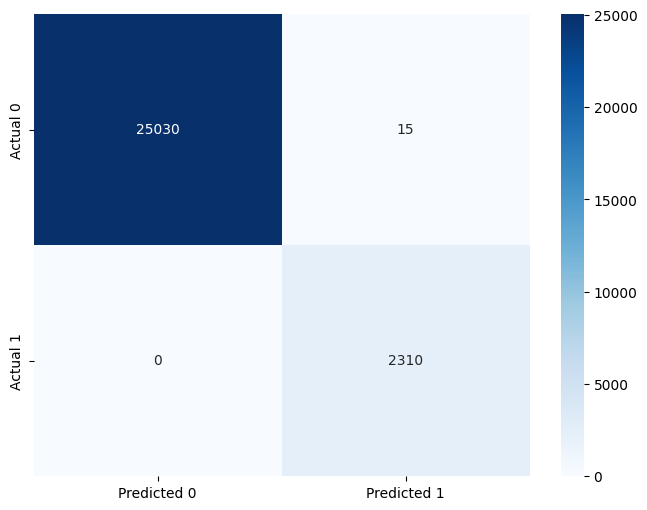

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.show()